# UPDATE FOR AF3

In [2]:
import json
import pandas as pd
file_path = "AF3\\1_NRZ\\USE1_NBAS\\fold_nrz_use1_nbas_full_data_0.json"

# Load the JSON data from file
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a list of tuples containing token ID, residue ID, and chain ID
token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

# Extract residues for chain A and chain B using list comprehensions
residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

# Create an empty DataFrame with rows representing residues from chain B and columns representing residues from chain A
df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

# Fill the DataFrame with corresponding scores from the contact_probs data
for i, row_residue_id in enumerate(residues_chain_b):
    for j, col_residue_id in enumerate(residues_chain_a):
        token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
        token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
        score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
        df.at[row_residue_id, col_residue_id] = 1 - score

# Print the DataFrame
print(df)

      1    2    3    4    5    6    7    8    9    10   ...  250  251  252  \
1     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
2     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
3     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
4     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
5     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1195  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
1196  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
1197  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
1198  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
1199  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

      253  254  255  256  257  258  259  
1     1.0  1.0  1.0  

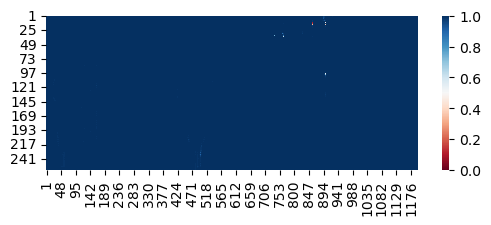

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the data in DataFrame to numeric type
df_numeric = df.apply(pd.to_numeric)

# OPTIONAL IF CHAINS ARE SWITCHED
transposed_df = df_numeric.T

# Create the heatmap with the custom colormap
plt.figure(figsize=(6, 2))
sns.heatmap(transposed_df, cmap="RdBu", vmin=0, vmax=1)

# Show the plot
plt.show()

## !!! sometimes it is important to specify df_mean = df_mean.apply(pd.to_numeric)

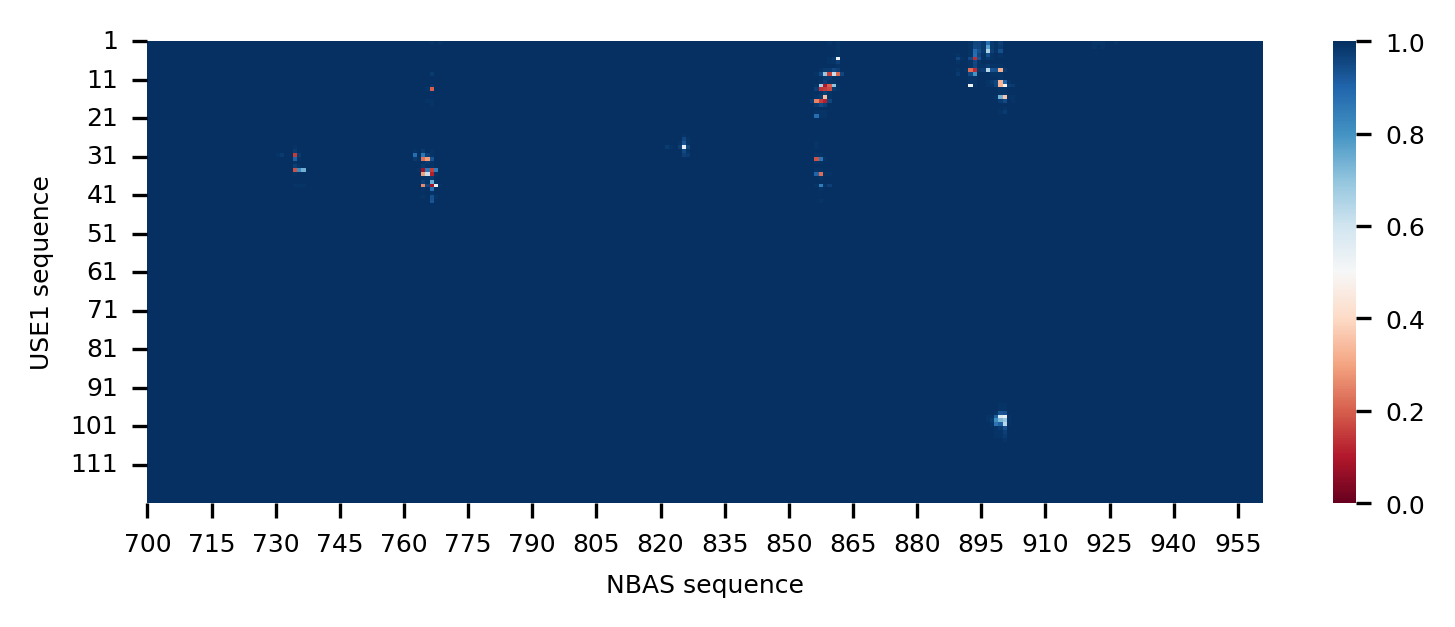

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\1_NRZ\\USE1_NBAS\\fold_nrz_use1_nbas_full_data_0.json",
    "AF3\\1_NRZ\\USE1_NBAS\\fold_nrz_use1_nbas_full_data_1.json",
    "AF3\\1_NRZ\\USE1_NBAS\\fold_nrz_use1_nbas_full_data_2.json",
    "AF3\\1_NRZ\\USE1_NBAS\\fold_nrz_use1_nbas_full_data_3.json",
    "AF3\\1_NRZ\\USE1_NBAS\\fold_nrz_use1_nbas_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain B using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain B and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

# Define the range of rows and columns you want to plot
row_range = slice(0, 120)  # This will select rows 200 to 300
col_range = slice(699, 960)  # This will select columns 1180 to 1280

# Select the subset of data
df_zoom = df_mean.iloc[row_range, col_range]

df_zoom = df_zoom.apply(pd.to_numeric)

# Now, you can plot your heatmap as before
plt.figure(figsize=(6, 2), dpi=300)
ax = sns.heatmap(df_zoom, cmap="RdBu", vmin=0, vmax=1)

x_axis_set = 15
y_axis_set = 10
font_size = 6

# Get the colorbar
cbar = ax.collections[0].colorbar

# Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

plt.xticks(range(0, df_zoom.shape[1], x_axis_set), df_zoom.columns[::x_axis_set], rotation=0, fontsize=font_size)
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('USE1 sequence', rotation=90, fontsize=font_size)
plt.gca().set_xlabel('NBAS sequence', fontsize=font_size)

plt.show()


# USE1 site

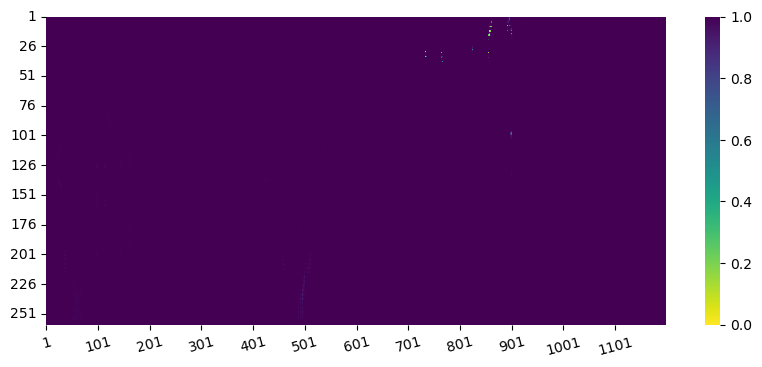

In [10]:
# Define the paths to your files
# Define the paths to your JSON files
file_paths = [
    "AF3\\1_NRZ\\USE1_NBAS\\fold_nrz_use1_nbas_full_data_0.json",
    "AF3\\1_NRZ\\USE1_NBAS\\fold_nrz_use1_nbas_full_data_1.json",
    "AF3\\1_NRZ\\USE1_NBAS\\fold_nrz_use1_nbas_full_data_2.json",
    "AF3\\1_NRZ\\USE1_NBAS\\fold_nrz_use1_nbas_full_data_3.json",
    "AF3\\1_NRZ\\USE1_NBAS\\fold_nrz_use1_nbas_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain B using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain B and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df_mean, cmap='viridis_r', vmin=0, vmax=1)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_mean.shape[1], 100), df_mean.columns[::100], rotation=15)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_mean.shape[0], 25), df_mean.index[::25])

# Show the plot
plt.show()

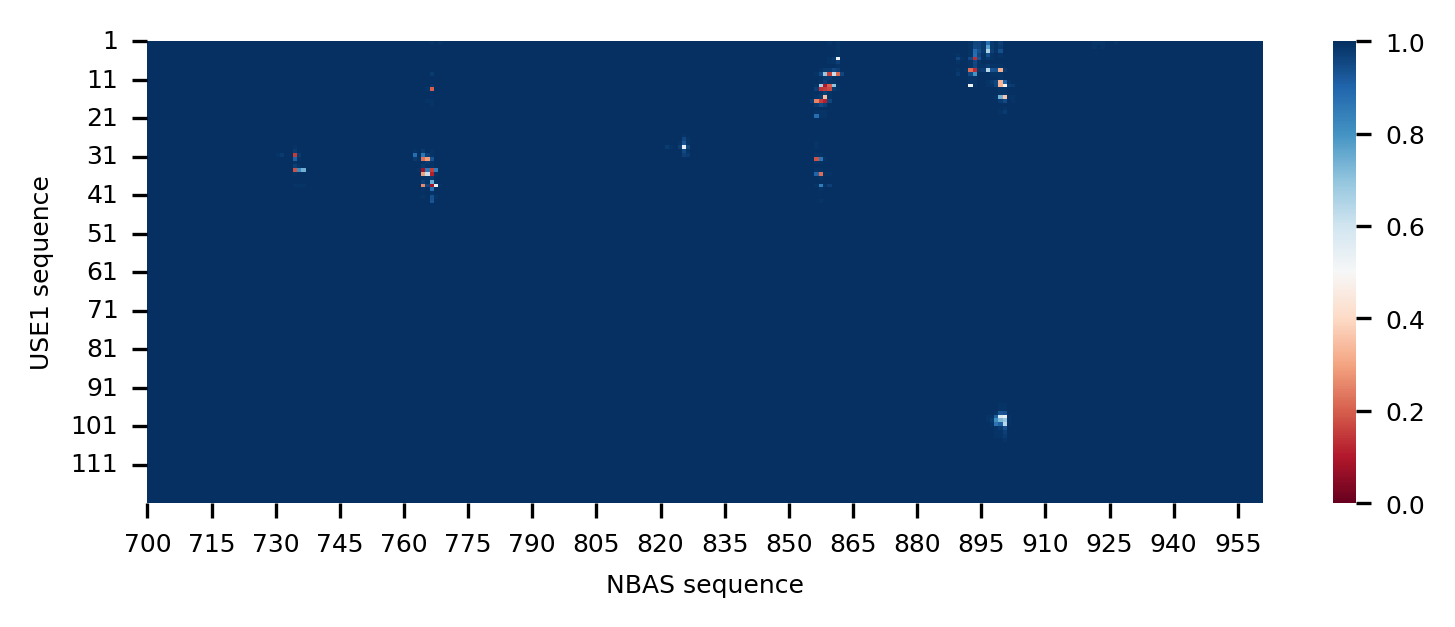

In [14]:

# Define the range of rows and columns you want to plot
row_range = slice(0, 120)  # This will select rows 200 to 300
col_range = slice(699, 960)  # This will select columns 1180 to 1280

# Select the subset of data
df_zoom = df_mean.iloc[row_range, col_range]

# Now, you can plot your heatmap as before
plt.figure(figsize=(6, 2), dpi=300)
ax = sns.heatmap(df_zoom, cmap="RdBu", vmin=0, vmax=1)

x_axis_set = 15
y_axis_set = 10
font_size = 6

# Get the colorbar
cbar = ax.collections[0].colorbar

# Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

plt.xticks(range(0, df_zoom.shape[1], x_axis_set), df_zoom.columns[::x_axis_set], rotation=0, fontsize=font_size)
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('USE1 sequence', rotation=90, fontsize=font_size)
plt.gca().set_xlabel('NBAS sequence', fontsize=font_size)

plt.show()


# now ZW10

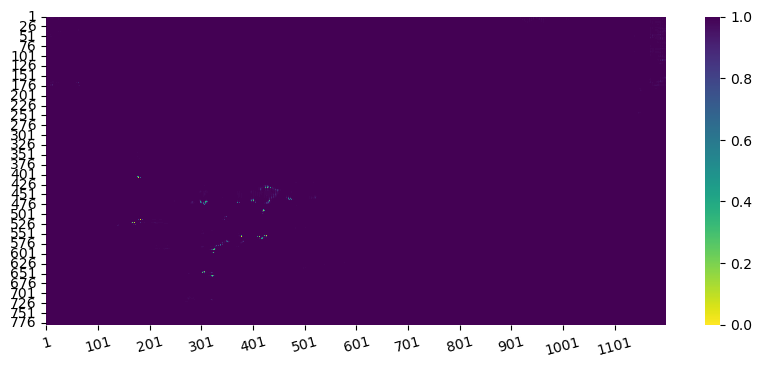

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\1_NRZ\\ZW10-NBAS\\fold_nrz_zw10_nbas_full_data_0.json",
    "AF3\\1_NRZ\\ZW10-NBAS\\fold_nrz_zw10_nbas_full_data_1.json",
    "AF3\\1_NRZ\\ZW10-NBAS\\fold_nrz_zw10_nbas_full_data_2.json",
    "AF3\\1_NRZ\\ZW10-NBAS\\fold_nrz_zw10_nbas_full_data_3.json",
    "AF3\\1_NRZ\\ZW10-NBAS\\fold_nrz_zw10_nbas_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain B using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain B and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).apply(pd.to_numeric).T

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df_mean, cmap='viridis_r', vmin=0, vmax=1)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_mean.shape[1], 100), df_mean.columns[::100], rotation=15)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_mean.shape[0], 25), df_mean.index[::25])

# Show the plot
plt.show()

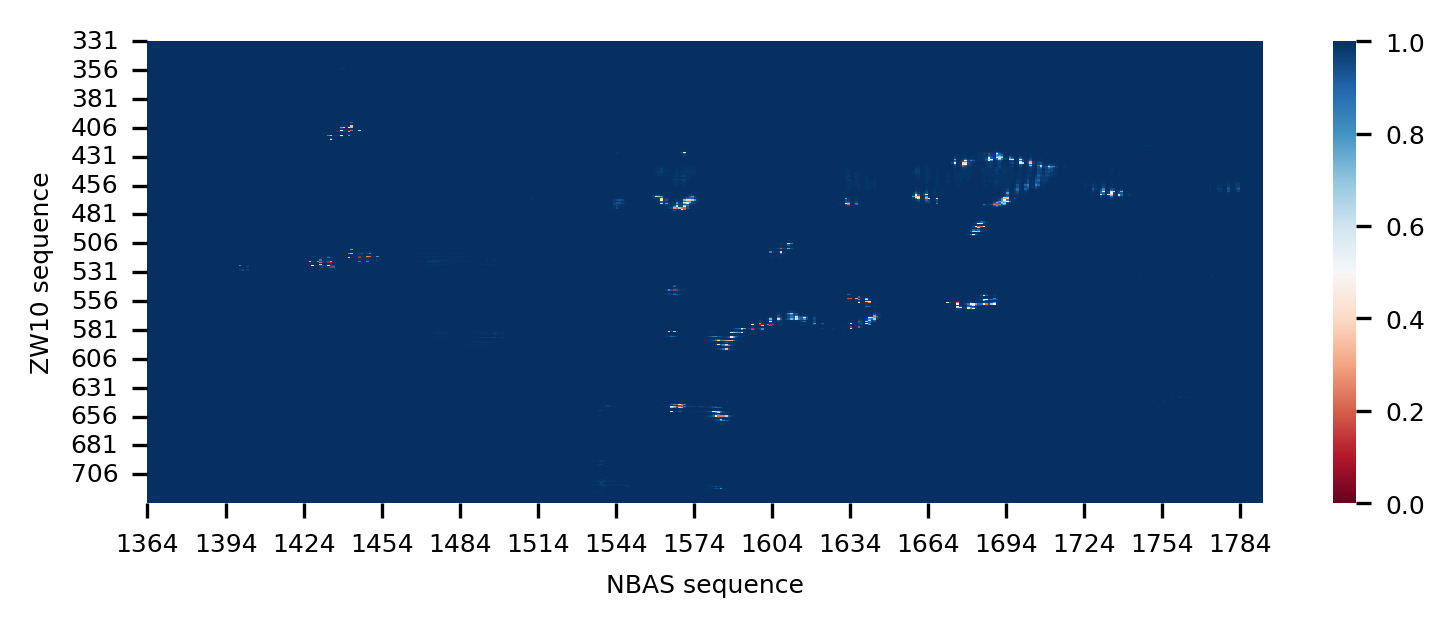

In [22]:
# Define the range of rows and columns you want to plot
row_range = slice(330, 730)  # This will select Y axis rows 200 to 300
col_range = slice(101, 530)  # This will select X axis columns 1180 to 1280

# Select the subset of data
df_zoom = df_mean.iloc[row_range, col_range]

# Now, you can plot your heatmap as before
plt.figure(figsize=(6, 2), dpi=300)
ax = sns.heatmap(df_zoom, cmap="RdBu", vmin=0, vmax=1)

x_axis_set = 30
y_axis_set = 25
font_size = 6

# Get the colorbar
cbar = ax.collections[0].colorbar

# Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+1262 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('ZW10 sequence', rotation=90, fontsize=font_size)
plt.gca().set_xlabel('NBAS sequence', fontsize=font_size)

plt.show()


# RINT1 ZW10

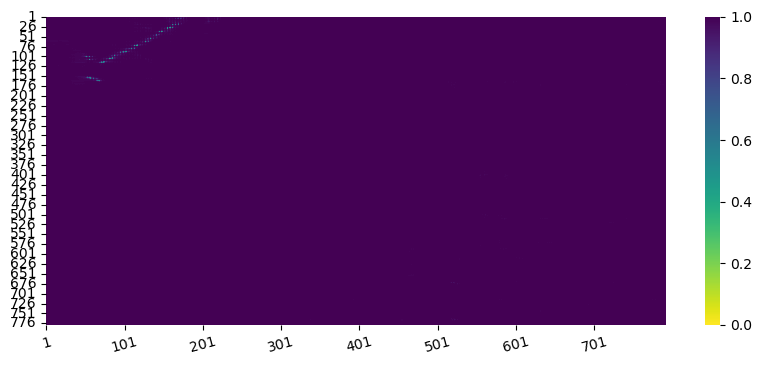

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\1_NRZ\\ZW10-RINT1\\fold_zw10_rint1_full_data_0.json",
    "AF3\\1_NRZ\\ZW10-RINT1\\fold_zw10_rint1_full_data_1.json",
    "AF3\\1_NRZ\\ZW10-RINT1\\fold_zw10_rint1_full_data_2.json",
    "AF3\\1_NRZ\\ZW10-RINT1\\fold_zw10_rint1_full_data_3.json",
    "AF3\\1_NRZ\\ZW10-RINT1\\fold_zw10_rint1_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain B using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain B and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df_mean, cmap='viridis_r', vmin=0, vmax=1)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_mean.shape[1], 100), df_mean.columns[::100], rotation=15)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_mean.shape[0], 25), df_mean.index[::25])

# Show the plot
plt.show()

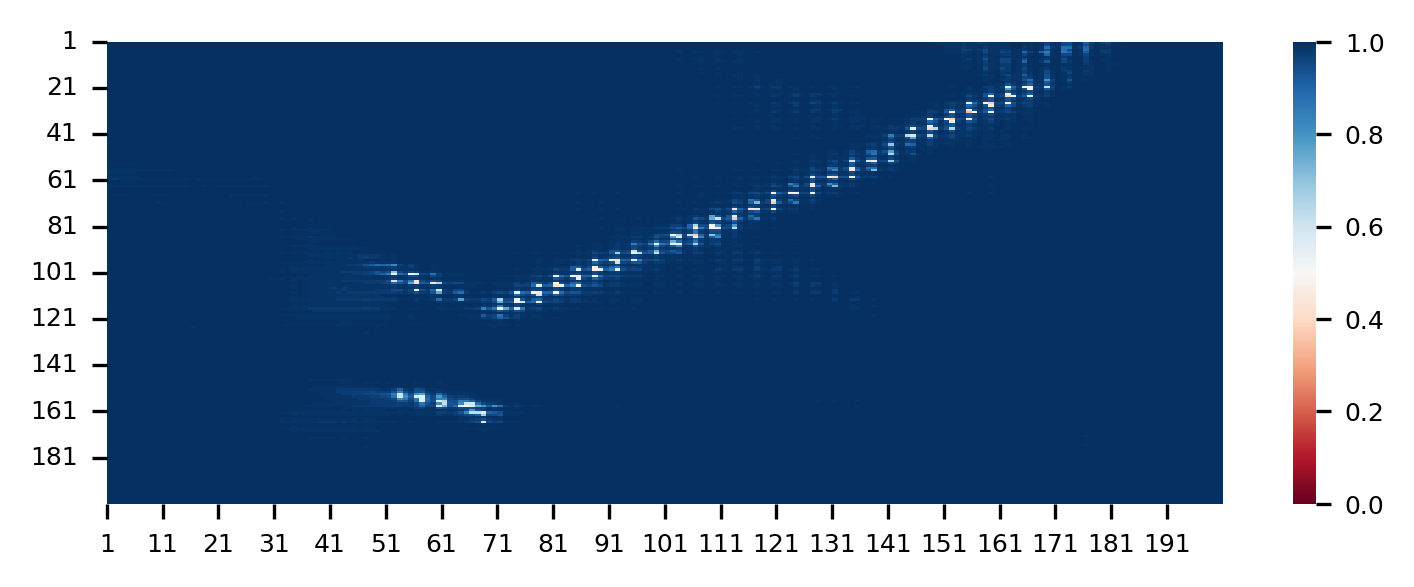

In [25]:
# Define the range of rows and columns you want to plot
row_range = slice(0, 200)  # This will select Y axis rows 200 to 300
col_range = slice(0, 200)  # This will select X axis columns 1180 to 1280

# Select the subset of data
df_zoom = df_mean.iloc[row_range, col_range]

# Now, you can plot your heatmap as before
plt.figure(figsize=(6, 2), dpi=300)
ax = sns.heatmap(df_zoom, cmap="RdBu", vmin=0, vmax=1, cbar=True)

x_axis_set = 10
y_axis_set = 20
font_size = 6

# Get the colorbar
cbar = ax.collections[0].colorbar

# Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)
# plt.gca().set_xlabel('NBAS sequence', fontsize=font_size)

plt.show()


# RINT1 BNIP1

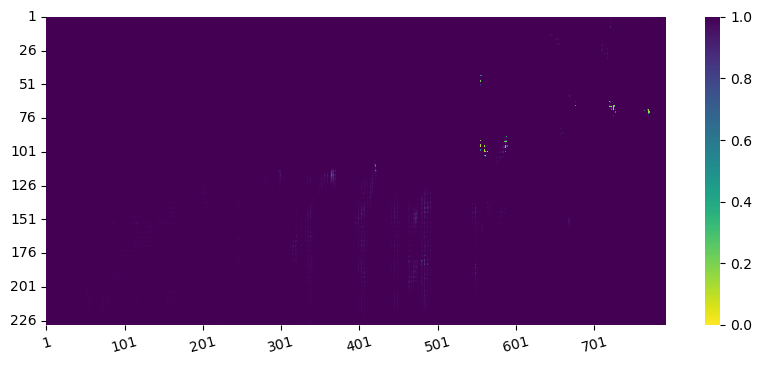

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\1_NRZ\\RINT1-BNIP1\\fold_nrz_rint1_bnip1_full_data_0.json",
    "AF3\\1_NRZ\\RINT1-BNIP1\\fold_nrz_rint1_bnip1_full_data_1.json",
    "AF3\\1_NRZ\\RINT1-BNIP1\\fold_nrz_rint1_bnip1_full_data_2.json",
    "AF3\\1_NRZ\\RINT1-BNIP1\\fold_nrz_rint1_bnip1_full_data_3.json",
    "AF3\\1_NRZ\\RINT1-BNIP1\\fold_nrz_rint1_bnip1_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain B using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain B and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_mean = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df_mean, cmap='viridis_r', vmin=0, vmax=1)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_mean.shape[1], 100), df_mean.columns[::100], rotation=15)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_mean.shape[0], 25), df_mean.index[::25])

# Show the plot
plt.show()

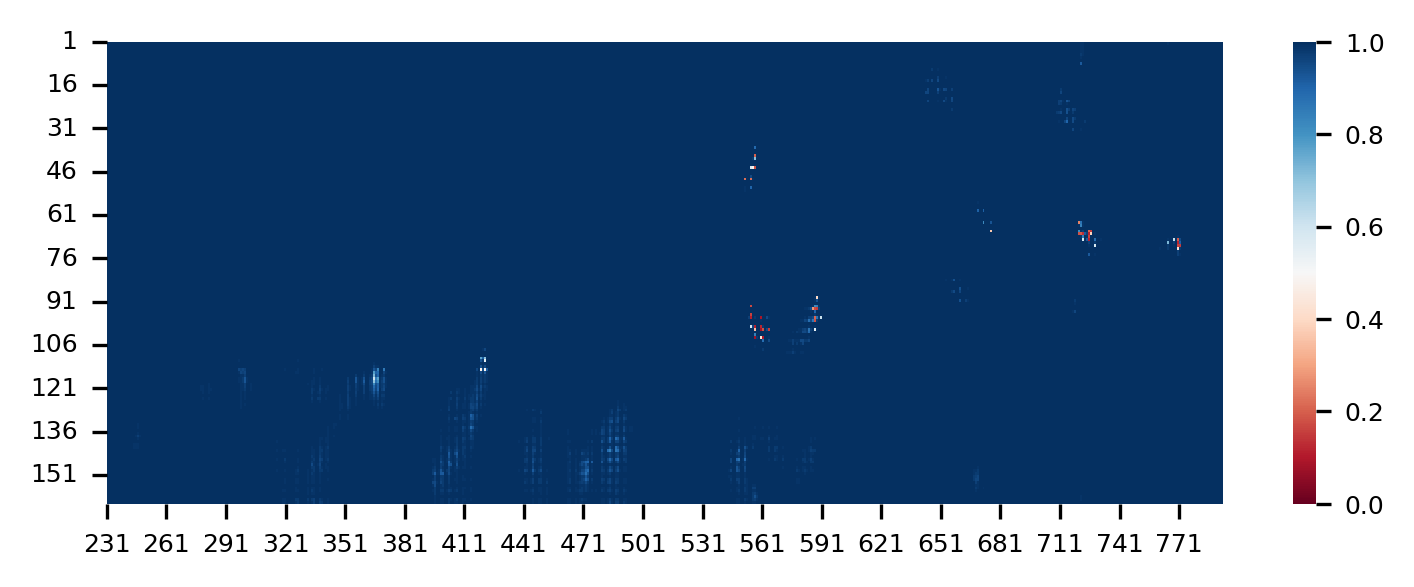

In [27]:
# Define the range of rows and columns you want to plot
row_range = slice(0, 160)  # This will select Y axis rows 200 to 300
col_range = slice(230, 792)  # This will select X axis columns 1180 to 1280

# Select the subset of data
df_zoom = df_mean.iloc[row_range, col_range]

# Now, you can plot your heatmap as before
plt.figure(figsize=(6, 2), dpi=300)
ax = sns.heatmap(df_zoom, cmap="RdBu", vmin=0, vmax=1, cbar=True)

x_axis_set = 30
y_axis_set = 15
font_size = 6

# Get the colorbar
cbar = ax.collections[0].colorbar

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)
# plt.gca().set_xlabel('NBAS sequence', fontsize=font_size)

plt.show()

# RAB18

## ZW10 NBAS RINT1 RAB18 solely

#### ZW10

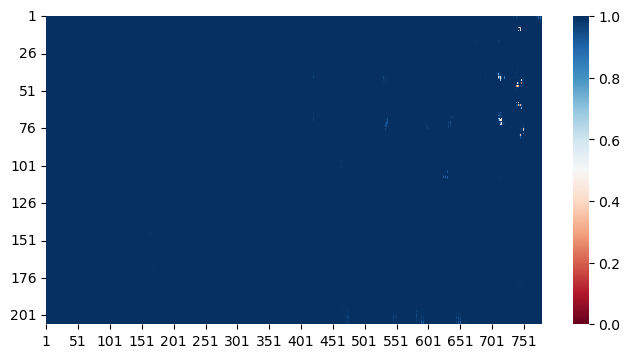

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\2_NRZ_Rab18\\ZW10-Rab18\\fold_rab18s_rab18_zw10_full_data_0.json",
    "AF3\\2_NRZ_Rab18\\ZW10-Rab18\\fold_rab18s_rab18_zw10_full_data_1.json",
    "AF3\\2_NRZ_Rab18\\ZW10-Rab18\\fold_rab18s_rab18_zw10_full_data_2.json",
    "AF3\\2_NRZ_Rab18\\ZW10-Rab18\\fold_rab18s_rab18_zw10_full_data_3.json",
    "AF3\\2_NRZ_Rab18\\ZW10-Rab18\\fold_rab18s_rab18_zw10_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain B using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain B and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_mean = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_mean, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 25
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_mean.shape[1], x_axis_set), [int(i)+0 for i in df_mean.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_mean.shape[0], y_axis_set), df_mean.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

#### RINT1

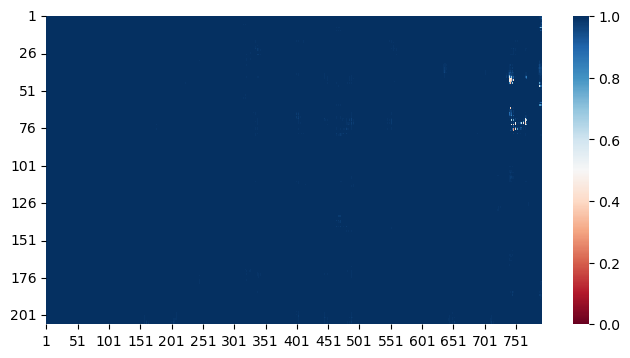

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\2_NRZ_Rab18\\RINT1-Rab18\\fold_rab18s_rint1_rab18_full_data_0.json",
    "AF3\\2_NRZ_Rab18\\RINT1-Rab18\\fold_rab18s_rint1_rab18_full_data_1.json",
    "AF3\\2_NRZ_Rab18\\RINT1-Rab18\\fold_rab18s_rint1_rab18_full_data_2.json",
    "AF3\\2_NRZ_Rab18\\RINT1-Rab18\\fold_rab18s_rint1_rab18_full_data_3.json",
    "AF3\\2_NRZ_Rab18\\RINT1-Rab18\\fold_rab18s_rint1_rab18_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain B using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain B and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 25
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_xlabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

#### NBAS

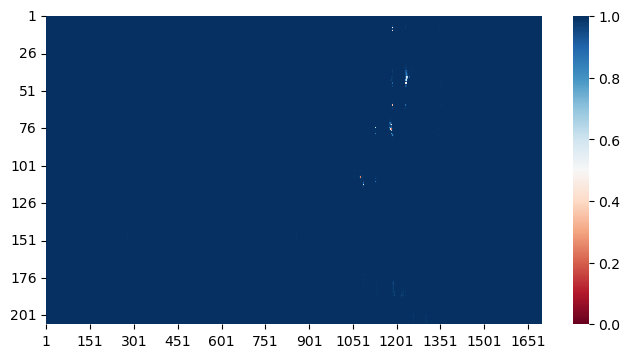

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\2_NRZ_Rab18\\Rab18_NBAS\\fold_rab18_rab18_nbas1_1700_full_data_0.json",
    "AF3\\2_NRZ_Rab18\\Rab18_NBAS\\fold_rab18_rab18_nbas1_1700_full_data_1.json",
    "AF3\\2_NRZ_Rab18\\Rab18_NBAS\\fold_rab18_rab18_nbas1_1700_full_data_2.json",
    "AF3\\2_NRZ_Rab18\\Rab18_NBAS\\fold_rab18_rab18_nbas1_1700_full_data_3.json",
    "AF3\\2_NRZ_Rab18\\Rab18_NBAS\\fold_rab18_rab18_nbas1_1700_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain B using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain B and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

df_zoom = df_mean.apply(pd.to_numeric).T

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 150
y_axis_set = 25
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

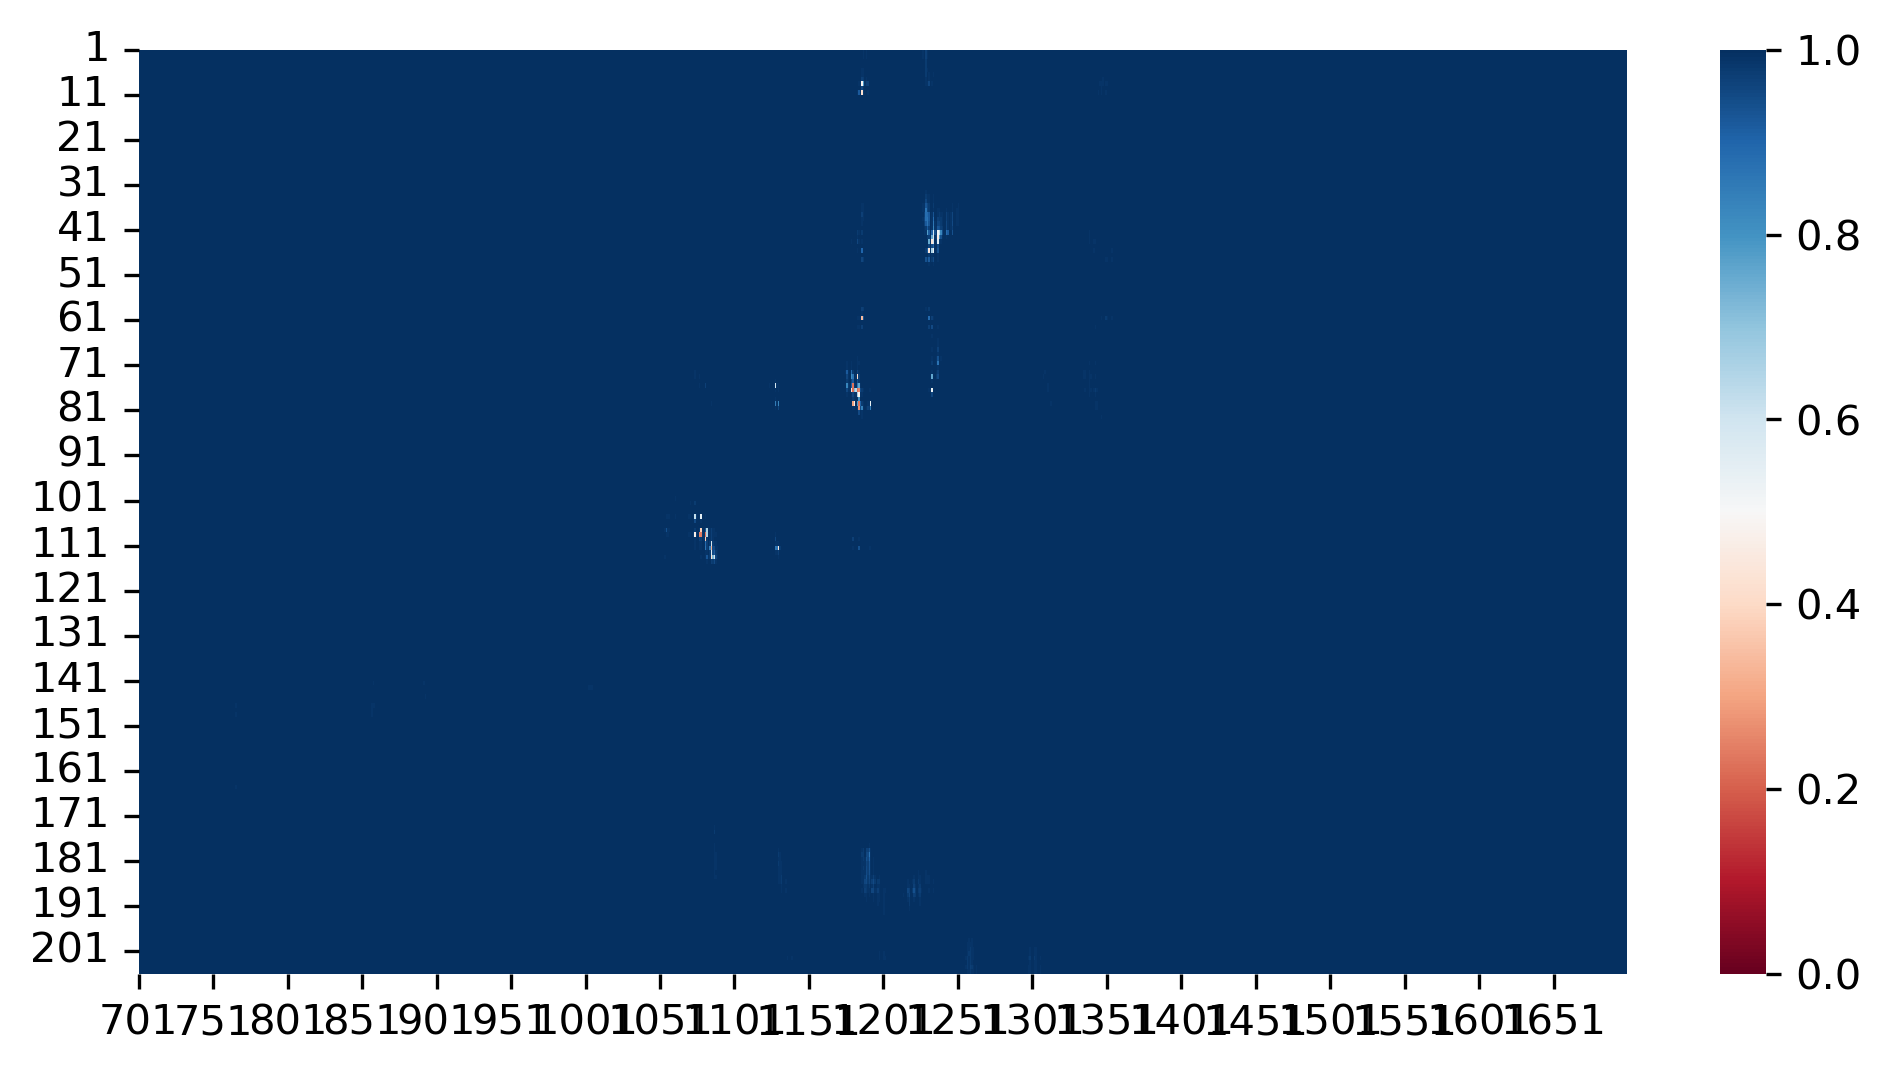

In [2]:
# Define the range of rows and columns you want to plot
row_range = slice(0, 205)  # This will select Y axis rows 200 to 300
col_range = slice(700, 1700)  # This will select X axis columns 1180 to 1280

# Select the subset of data
df_zoom_zoom = df_zoom.iloc[row_range, col_range]

# Now, you can plot your heatmap as before
plt.figure(figsize=(8, 4), dpi=300)
ax = sns.heatmap(df_zoom_zoom, cmap="RdBu", vmin=0, vmax=1, cbar=True)

x_axis_set = 100
y_axis_set = 10
font_size = 10

# Get the colorbar
cbar = ax.collections[0].colorbar

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

plt.xticks(range(0, df_zoom_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)
plt.yticks(range(0, df_zoom_zoom.shape[0], y_axis_set), df_zoom_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)
# plt.gca().set_xlabel('NBAS sequence', fontsize=font_size)

plt.show()

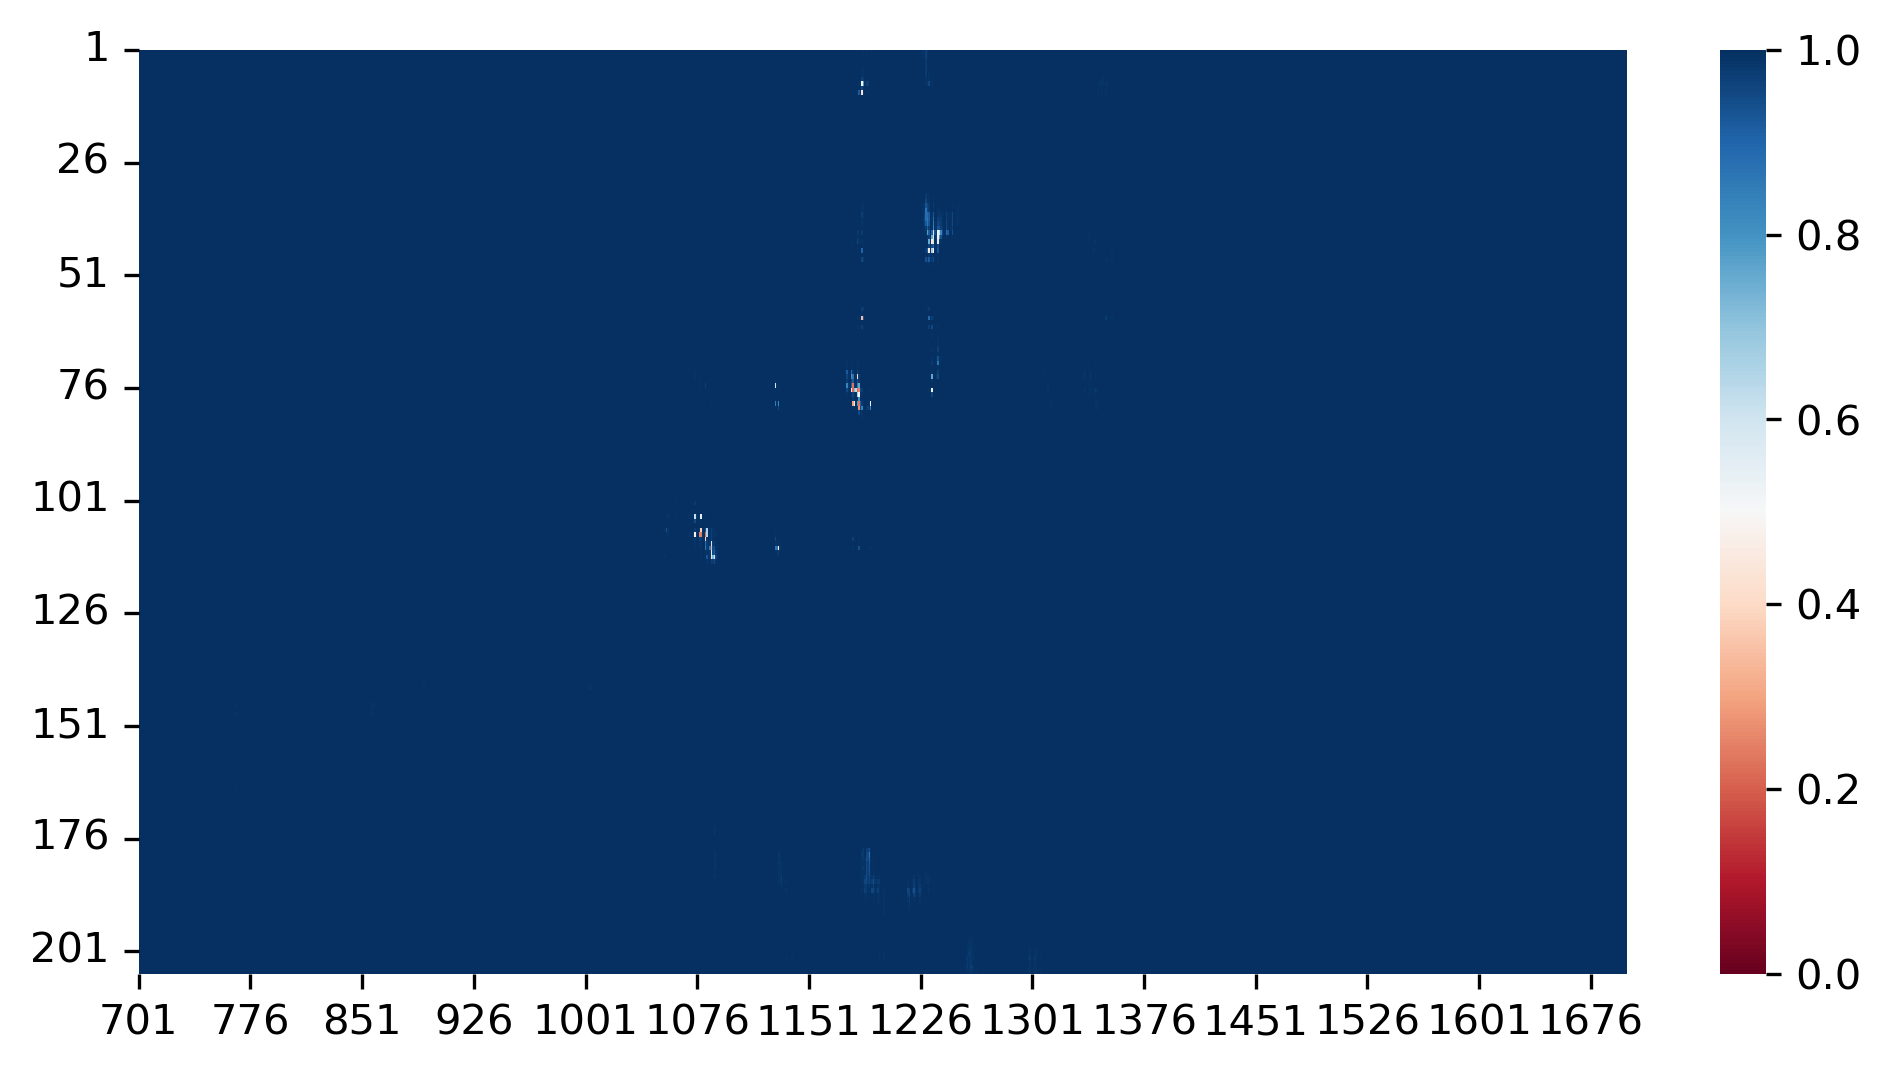

In [8]:
# Now, you can plot your heatmap as before
plt.figure(figsize=(8, 4), dpi=300)
ax = sns.heatmap(df_zoom_zoom, cmap="RdBu", vmin=0, vmax=1, cbar=True)

x_axis_set = 75
y_axis_set = 25
font_size = 10

# Get the colorbar
cbar = ax.collections[0].colorbar

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

plt.xticks(range(0, df_zoom_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)
plt.yticks(range(0, df_zoom_zoom.shape[0], y_axis_set), df_zoom_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)
# plt.gca().set_xlabel('NBAS sequence', fontsize=font_size)

plt.show()

### contact site NBAS+ZW10+RAB18

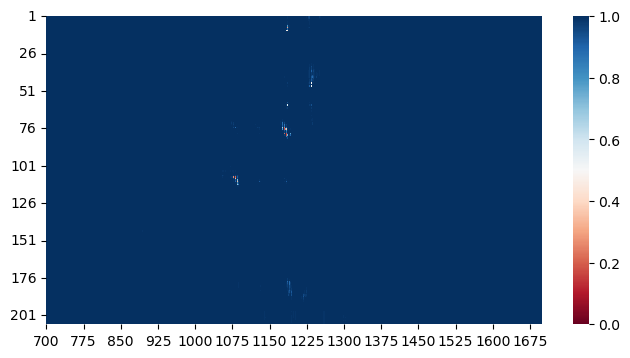

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\fold_rab18s_rab18_zw10_nbas700_1700_full_data_0.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\fold_rab18s_rab18_zw10_nbas700_1700_full_data_1.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\fold_rab18s_rab18_zw10_nbas700_1700_full_data_2.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\fold_rab18s_rab18_zw10_nbas700_1700_full_data_3.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\fold_rab18s_rab18_zw10_nbas700_1700_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'C']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'C')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 75
y_axis_set = 25
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+699 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

#### ZW10

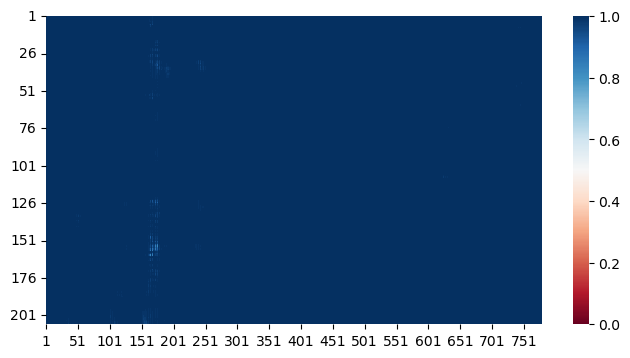

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\fold_rab18s_rab18_zw10_nbas700_1700_full_data_0.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\fold_rab18s_rab18_zw10_nbas700_1700_full_data_1.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\fold_rab18s_rab18_zw10_nbas700_1700_full_data_2.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\fold_rab18s_rab18_zw10_nbas700_1700_full_data_3.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\fold_rab18s_rab18_zw10_nbas700_1700_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 25
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

### contact site NBAS+ZW10+RAB18+RINT1

#### ZW10

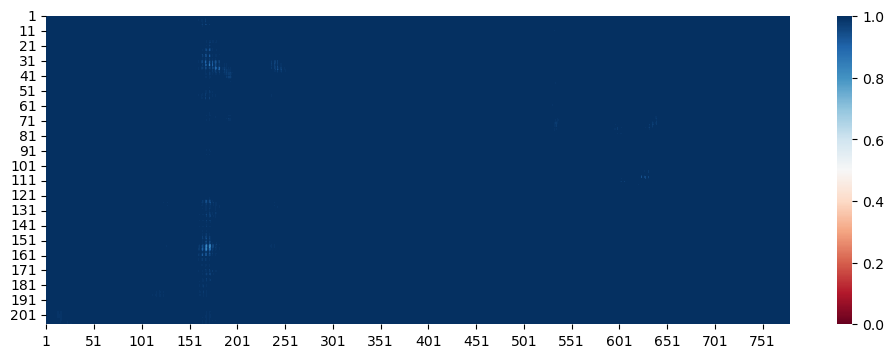

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS_RINT1\\fold_rab18_zw10_nbas7001700_rint1_full_data_0.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS_RINT1\\fold_rab18_zw10_nbas7001700_rint1_full_data_1.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS_RINT1\\fold_rab18_zw10_nbas7001700_rint1_full_data_2.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS_RINT1\\fold_rab18_zw10_nbas7001700_rint1_full_data_3.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS_RINT1\\fold_rab18_zw10_nbas7001700_rint1_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(12, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 10
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

#### NBAS 700-1700

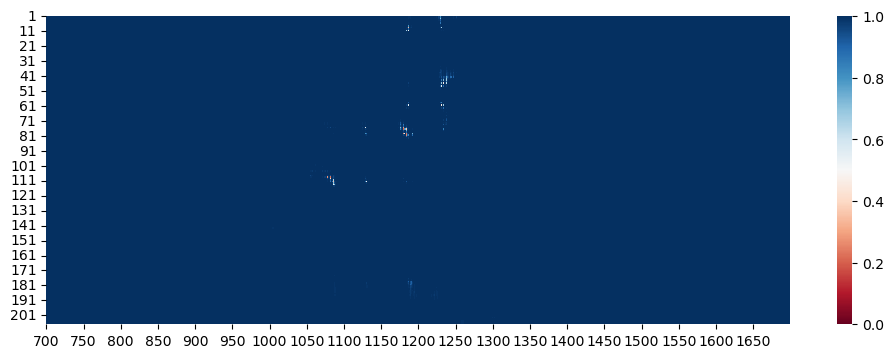

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS_RINT1\\fold_rab18_zw10_nbas7001700_rint1_full_data_0.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS_RINT1\\fold_rab18_zw10_nbas7001700_rint1_full_data_1.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS_RINT1\\fold_rab18_zw10_nbas7001700_rint1_full_data_2.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS_RINT1\\fold_rab18_zw10_nbas7001700_rint1_full_data_3.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS_RINT1\\fold_rab18_zw10_nbas7001700_rint1_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'C']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'C')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(12, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 10
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+699 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

#### RINT1

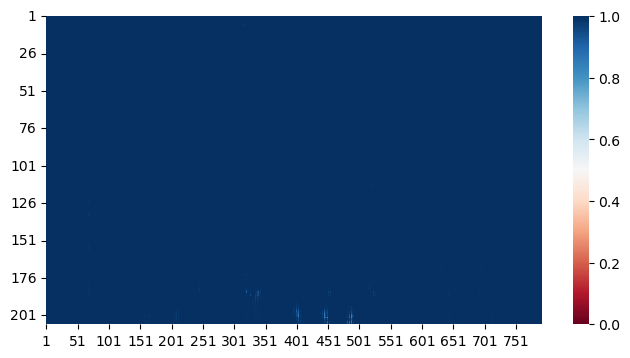

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS_RINT1\\fold_rab18_zw10_nbas7001700_rint1_full_data_0.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS_RINT1\\fold_rab18_zw10_nbas7001700_rint1_full_data_1.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS_RINT1\\fold_rab18_zw10_nbas7001700_rint1_full_data_2.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS_RINT1\\fold_rab18_zw10_nbas7001700_rint1_full_data_3.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS_RINT1\\fold_rab18_zw10_nbas7001700_rint1_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'D']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'D')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 25
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

# NMD

### SMG189 NBAS 400-2371

#### SMG1 NBAS

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\4_NBAS_NMD\\SMG189_NBAS4002371\\fold_smg189_nbas4002371_full_data_0.json",
    "AF3\\4_NBAS_NMD\\SMG189_NBAS4002371\\fold_smg189_nbas4002371_full_data_1.json",
    "AF3\\4_NBAS_NMD\\SMG189_NBAS4002371\\fold_smg189_nbas4002371_full_data_2.json",
    "AF3\\4_NBAS_NMD\\SMG189_NBAS4002371\\fold_smg189_nbas4002371_full_data_3.json",
    "AF3\\4_NBAS_NMD\\SMG189_NBAS4002371\\fold_smg189_nbas4002371_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'D']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'D')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 30
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

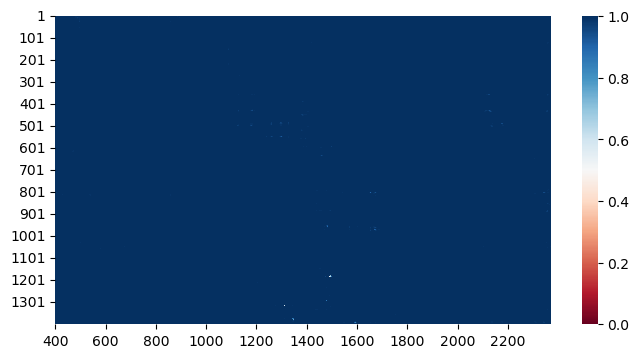

In [16]:
# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 200
y_axis_set = 100
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+399 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

In [26]:
# Initialize an empty set to collect unique amino acids
unique_amino_acids = set()
threshold_distance = 0.5

# Iterate over the rows of the DataFrame
for index, row in df_zoom.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column
            # Add the first amino acid to the set
            unique_amino_acids.add(int(amino_acids)+399)

# Convert the set to a sorted list
sorted_unique_amino_acids = sorted(unique_amino_acids)

# Print the sorted list of unique amino acids
print("Unique Amino Acids Sorted in Increasing Order:")
print(sorted_unique_amino_acids)
#NBAS

Unique Amino Acids Sorted in Increasing Order:
[1475, 1476, 1479, 1491, 1495]


In [22]:
# Initialize an empty set to collect unique amino acids
unique_amino_acids = set()
threshold_distance = 0.5

# Iterate over the rows of the DataFrame
for index, row in df_zoom.T.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column
            # Add the first amino acid to the set
            unique_amino_acids.add(int(amino_acids)+0)

# Convert the set to a sorted list
sorted_unique_amino_acids = sorted(unique_amino_acids)

# Print the sorted list of unique amino acids
print("Unique Amino Acids Sorted in Increasing Order:")
print(sorted_unique_amino_acids)
#SMG1

Unique Amino Acids Sorted in Increasing Order:
[1183, 1319, 1326, 1330, 1334]


#### SMG8 NBAS

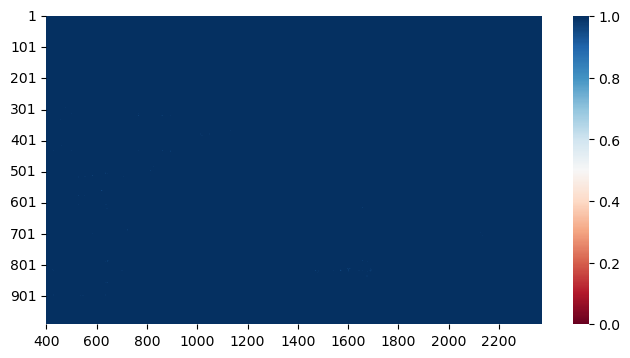

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\4_NBAS_NMD\\SMG189_NBAS4002371\\fold_smg189_nbas4002371_full_data_0.json",
    "AF3\\4_NBAS_NMD\\SMG189_NBAS4002371\\fold_smg189_nbas4002371_full_data_1.json",
    "AF3\\4_NBAS_NMD\\SMG189_NBAS4002371\\fold_smg189_nbas4002371_full_data_2.json",
    "AF3\\4_NBAS_NMD\\SMG189_NBAS4002371\\fold_smg189_nbas4002371_full_data_3.json",
    "AF3\\4_NBAS_NMD\\SMG189_NBAS4002371\\fold_smg189_nbas4002371_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'D']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'B')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'D')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 200
y_axis_set = 100
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+399 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

In [32]:
# Initialize an empty set to collect unique amino acids
unique_amino_acids = set()
threshold_distance = 0.5

# Iterate over the rows of the DataFrame
for index, row in df_zoom.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column
            # Add the first amino acid to the set
            unique_amino_acids.add(int(amino_acids)+399)

# Convert the set to a sorted list
sorted_unique_amino_acids = sorted(unique_amino_acids)

# Print the sorted list of unique amino acids
print("Unique Amino Acids Sorted in Increasing Order:")
print(sorted_unique_amino_acids)
#NBAS

Unique Amino Acids Sorted in Increasing Order:
[]


#### SMG9 NBAS

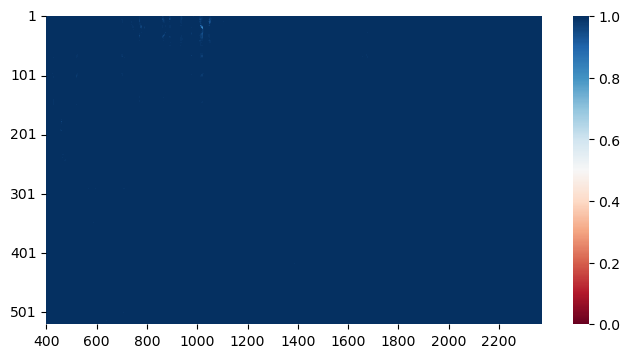

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\4_NBAS_NMD\\SMG189_NBAS4002371\\fold_smg189_nbas4002371_full_data_0.json",
    "AF3\\4_NBAS_NMD\\SMG189_NBAS4002371\\fold_smg189_nbas4002371_full_data_1.json",
    "AF3\\4_NBAS_NMD\\SMG189_NBAS4002371\\fold_smg189_nbas4002371_full_data_2.json",
    "AF3\\4_NBAS_NMD\\SMG189_NBAS4002371\\fold_smg189_nbas4002371_full_data_3.json",
    "AF3\\4_NBAS_NMD\\SMG189_NBAS4002371\\fold_smg189_nbas4002371_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'C']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'D']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'C')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'D')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 200
y_axis_set = 100
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+399 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

In [34]:
# Initialize an empty set to collect unique amino acids
unique_amino_acids = set()
threshold_distance = 0.5

# Iterate over the rows of the DataFrame
for index, row in df_zoom.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column
            # Add the first amino acid to the set
            unique_amino_acids.add(int(amino_acids)+399)

# Convert the set to a sorted list
sorted_unique_amino_acids = sorted(unique_amino_acids)

# Print the sorted list of unique amino acids
print("Unique Amino Acids Sorted in Increasing Order:")
print(sorted_unique_amino_acids)
#NBAS

Unique Amino Acids Sorted in Increasing Order:
[]


### UPF3B

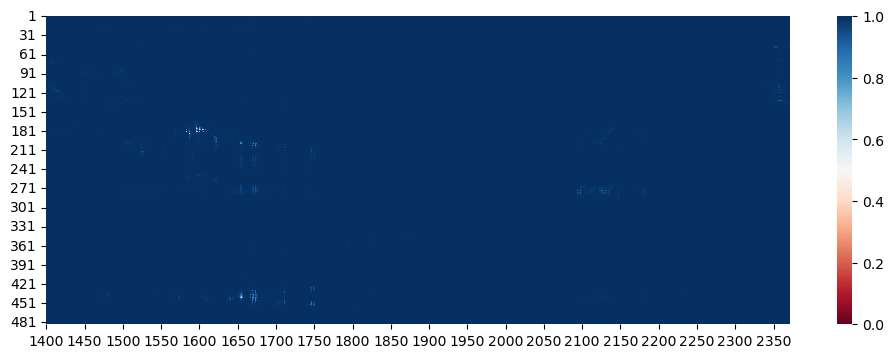

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\4_NBAS_NMD\\UPF3B-CtermNBAS\\fold_nmd_upf3b_nbas1400_2371_full_data_0.json",
    "AF3\\4_NBAS_NMD\\UPF3B-CtermNBAS\\fold_nmd_upf3b_nbas1400_2371_full_data_1.json",
    "AF3\\4_NBAS_NMD\\UPF3B-CtermNBAS\\fold_nmd_upf3b_nbas1400_2371_full_data_2.json",
    "AF3\\4_NBAS_NMD\\UPF3B-CtermNBAS\\fold_nmd_upf3b_nbas1400_2371_full_data_3.json",
    "AF3\\4_NBAS_NMD\\UPF3B-CtermNBAS\\fold_nmd_upf3b_nbas1400_2371_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(12, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 30
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+1399 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

### UPF1 + NBAS

#### NBAS 1-850

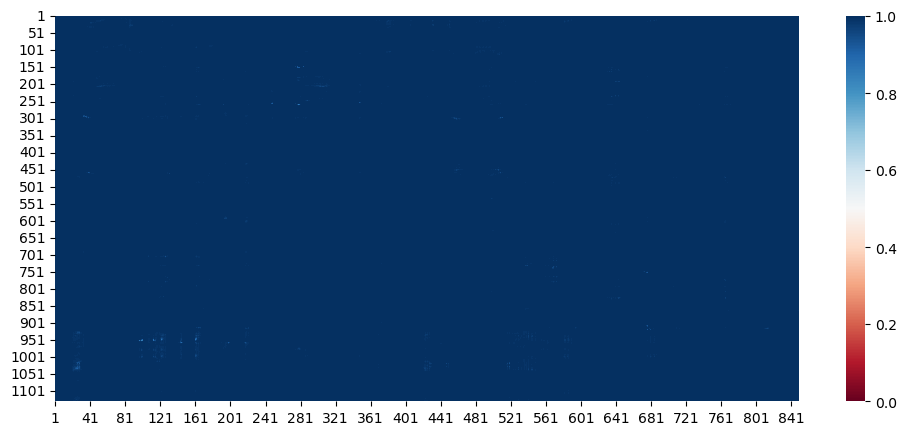

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AF3\\4_NBAS_NMD\\UPF1-NtermNBAS\\fold_nmd_upf1_nbas1_850_full_data_0.json",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AF3\\4_NBAS_NMD\\UPF1-NtermNBAS\\fold_nmd_upf1_nbas1_850_full_data_1.json",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AF3\\4_NBAS_NMD\\UPF1-NtermNBAS\\fold_nmd_upf1_nbas1_850_full_data_2.json",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AF3\\4_NBAS_NMD\\UPF1-NtermNBAS\\fold_nmd_upf1_nbas1_850_full_data_3.json",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AF3\\4_NBAS_NMD\\UPF1-NtermNBAS\\fold_nmd_upf1_nbas1_850_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(12, 5))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 40
y_axis_set = 50
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

#### NBAS 771-1571

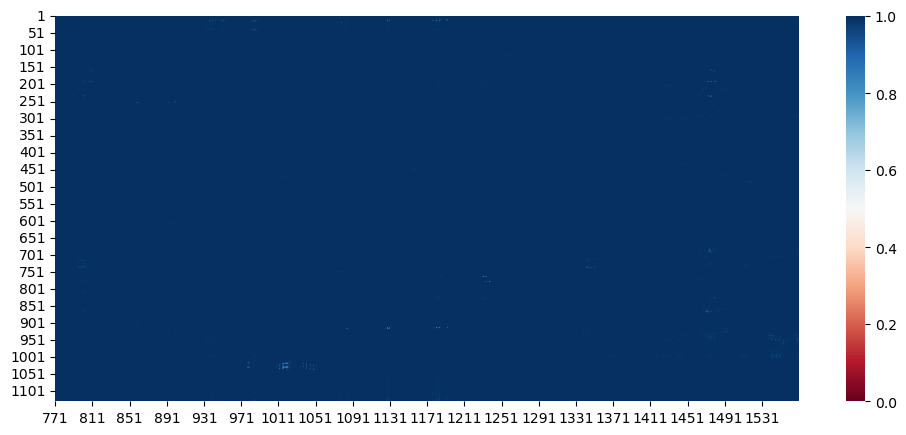

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AF3\\4_NBAS_NMD\\UPF1-Sec39NBAS\\fold_nmd_upf1_nbas771_1571_full_data_0.json",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AF3\\4_NBAS_NMD\\UPF1-Sec39NBAS\\fold_nmd_upf1_nbas771_1571_full_data_1.json",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AF3\\4_NBAS_NMD\\UPF1-Sec39NBAS\\fold_nmd_upf1_nbas771_1571_full_data_2.json",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AF3\\4_NBAS_NMD\\UPF1-Sec39NBAS\\fold_nmd_upf1_nbas771_1571_full_data_3.json",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AF3\\4_NBAS_NMD\\UPF1-Sec39NBAS\\fold_nmd_upf1_nbas771_1571_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(12, 5))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 40
y_axis_set = 50
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+770 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

#### NBAS 1571-2371

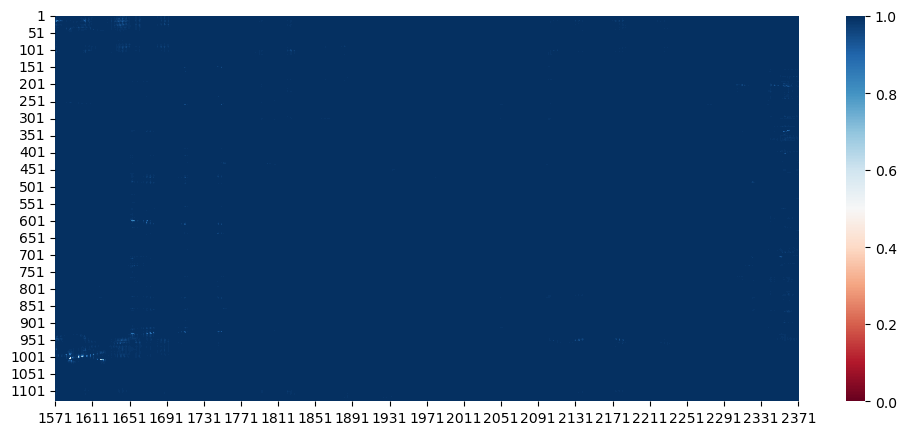

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AF3\\4_NBAS_NMD\\UPF1-CtermNBAS\\fold_nmd_upf1_nbas1571_2371_full_data_0.json",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AF3\\4_NBAS_NMD\\UPF1-CtermNBAS\\fold_nmd_upf1_nbas1571_2371_full_data_1.json",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AF3\\4_NBAS_NMD\\UPF1-CtermNBAS\\fold_nmd_upf1_nbas1571_2371_full_data_2.json",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AF3\\4_NBAS_NMD\\UPF1-CtermNBAS\\fold_nmd_upf1_nbas1571_2371_full_data_3.json",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AF3\\4_NBAS_NMD\\UPF1-CtermNBAS\\fold_nmd_upf1_nbas1571_2371_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(12, 5))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 40
y_axis_set = 50
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+1570 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

### UPF3A

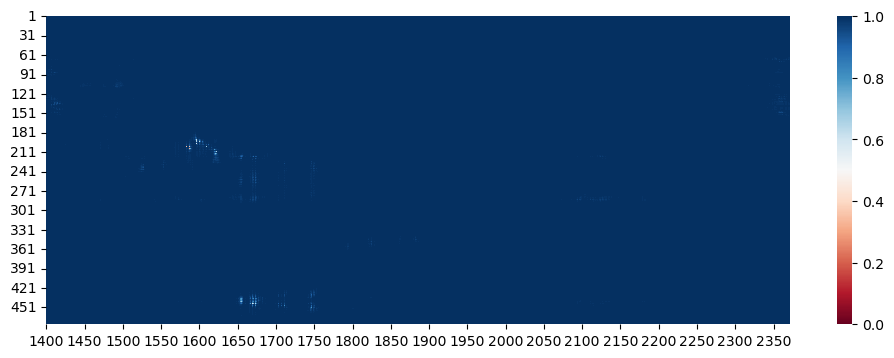

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\4_NBAS_NMD\\upf3a-nbas\\fold_nmd_upf3a_nbas1400_2371_full_data_0.json",
    "AF3\\4_NBAS_NMD\\upf3a-nbas\\fold_nmd_upf3a_nbas1400_2371_full_data_1.json",
    "AF3\\4_NBAS_NMD\\upf3a-nbas\\fold_nmd_upf3a_nbas1400_2371_full_data_2.json",
    "AF3\\4_NBAS_NMD\\upf3a-nbas\\fold_nmd_upf3a_nbas1400_2371_full_data_3.json",
    "AF3\\4_NBAS_NMD\\upf3a-nbas\\fold_nmd_upf3a_nbas1400_2371_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(12, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbarя
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 30
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+1399 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

# TANGO1

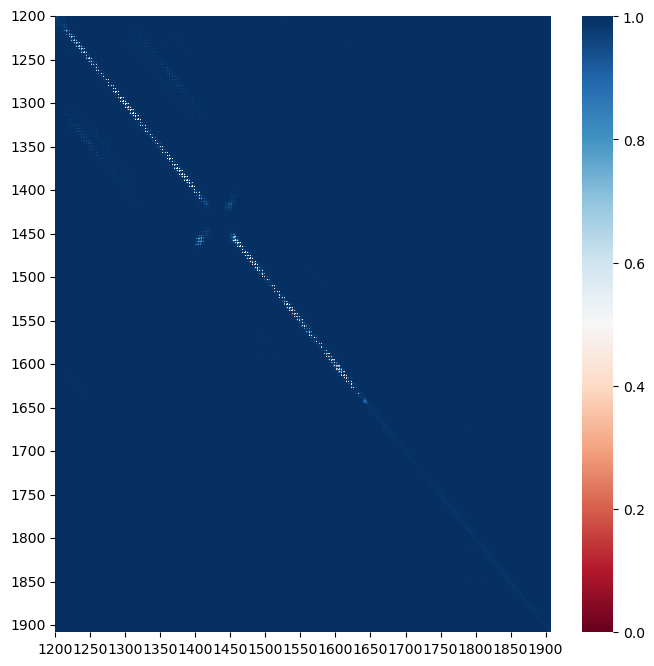

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_0.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_1.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_2.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_3.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 8))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbarя
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 50
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+1199 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), [int(i)+1199 for i in df_zoom.columns[::y_axis_set]], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

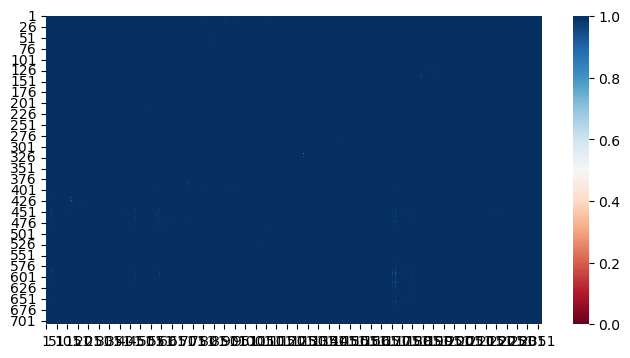

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_0.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_1.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_2.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_3.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'C']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'C')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 25
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

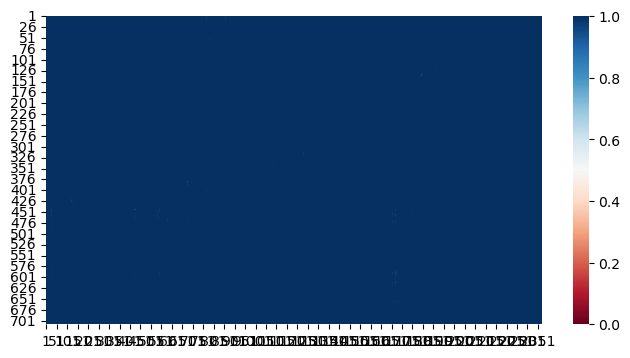

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_0.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_1.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_2.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_3.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'C']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'B')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'C')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 25
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

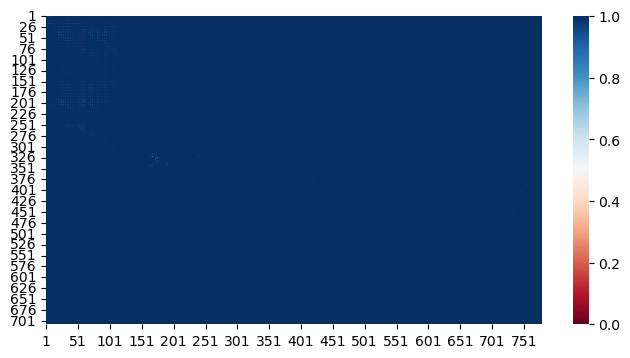

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_0.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_1.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_2.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_3.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'D']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'D')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 25
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

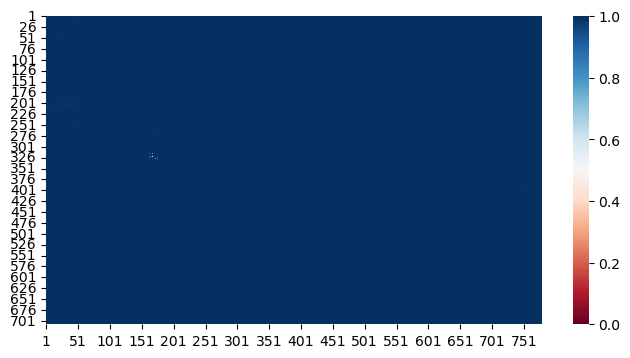

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_0.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_1.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_2.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_3.json",
    "AF3\\3_NRZ_TANGO1\\fold_tango1_dimer_nbas_zw10\\fold_tango1_dimer_nbas_zw10_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'D']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'B')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'D')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=1)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 25
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

# contact aa

#### USE1

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json


file_paths = [
    "AF3\\1_NRZ\\USE1_NBAS\\fold_nrz_use1_nbas_full_data_0.json",
    "AF3\\1_NRZ\\USE1_NBAS\\fold_nrz_use1_nbas_full_data_1.json",
    "AF3\\1_NRZ\\USE1_NBAS\\fold_nrz_use1_nbas_full_data_2.json",
    "AF3\\1_NRZ\\USE1_NBAS\\fold_nrz_use1_nbas_full_data_3.json",
    "AF3\\1_NRZ\\USE1_NBAS\\fold_nrz_use1_nbas_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain B using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain B and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T
# Initialize an empty set to collect unique amino acids
unique_amino_acids = set()
threshold_distance = 0.5

# Iterate over the rows of the DataFrame
for index, row in df_mean.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column
            # Add the first amino acid to the set
            unique_amino_acids.add(int(amino_acids))

# Convert the set to a sorted list
sorted_unique_amino_acids = sorted(unique_amino_acids)

# Print the sorted list of unique amino acids
print("Unique Amino Acids Sorted in Increasing Order:")
print(sorted_unique_amino_acids)


Unique Amino Acids Sorted in Increasing Order:
[734, 764, 765, 766, 856, 857, 858, 859, 861, 892, 893, 899, 900]


## contact aa ZW10

In [19]:
file_paths = [
    "AF3\\1_NRZ\\ZW10-NBAS\\fold_nrz_zw10_nbas_full_data_0.json",
    "AF3\\1_NRZ\\ZW10-NBAS\\fold_nrz_zw10_nbas_full_data_1.json",
    "AF3\\1_NRZ\\ZW10-NBAS\\fold_nrz_zw10_nbas_full_data_2.json",
    "AF3\\1_NRZ\\ZW10-NBAS\\fold_nrz_zw10_nbas_full_data_3.json",
    "AF3\\1_NRZ\\ZW10-NBAS\\fold_nrz_zw10_nbas_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain B using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain B and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T
# Initialize an empty set to collect unique amino acids
unique_amino_acids = set()
threshold_distance = 0.5

# Iterate over the rows of the DataFrame
for index, row in df_mean.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column
            # Add the first amino acid to the set
            unique_amino_acids.add(int(amino_acids)+1171) # cuz it adds and starts to 0 value in python

# Convert the set to a sorted list
sorted_unique_amino_acids = sorted(unique_amino_acids)

# Print the sorted list of unique amino acids
print("Unique Amino Acids Sorted in Increasing Order:")
print(sorted_unique_amino_acids)


Unique Amino Acids Sorted in Increasing Order:
[1336, 1338, 1339, 1340, 1342, 1343, 1347, 1348, 1350, 1351, 1354, 1357, 1358, 1470, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1490, 1491, 1492, 1493, 1495, 1496, 1497, 1501, 1505, 1508, 1509, 1512, 1515, 1516, 1542, 1543, 1546, 1547, 1549, 1550, 1552, 1568, 1569, 1572, 1573, 1576, 1584, 1585, 1586, 1587, 1588, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1605, 1608, 1612, 1640, 1643]


In [22]:
file_paths = [
    "AF3\\1_NRZ\\ZW10-NBAS\\fold_nrz_zw10_nbas_full_data_0.json",
    "AF3\\1_NRZ\\ZW10-NBAS\\fold_nrz_zw10_nbas_full_data_1.json",
    "AF3\\1_NRZ\\ZW10-NBAS\\fold_nrz_zw10_nbas_full_data_2.json",
    "AF3\\1_NRZ\\ZW10-NBAS\\fold_nrz_zw10_nbas_full_data_3.json",
    "AF3\\1_NRZ\\ZW10-NBAS\\fold_nrz_zw10_nbas_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain B using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain B and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)
# Initialize an empty set to collect unique amino acids
unique_amino_acids = set()
threshold_distance = 0.5

# Iterate over the rows of the DataFrame
for index, row in df_mean.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column
            # Add the first amino acid to the set
            unique_amino_acids.add(int(amino_acids)+0) # cuz it adds and starts to 0 value in python

# Convert the set to a sorted list
sorted_unique_amino_acids = sorted(unique_amino_acids)

# Print the sorted list of unique amino acids
print("Unique Amino Acids Sorted in Increasing Order:")
print(sorted_unique_amino_acids)


Unique Amino Acids Sorted in Increasing Order:
[404, 405, 408, 409, 412, 416, 427, 428, 431, 432, 433, 436, 437, 461, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 488, 491, 492, 495, 498, 510, 513, 514, 517, 518, 521, 522, 524, 525, 526, 546, 551, 553, 554, 556, 557, 558, 561, 562, 569, 570, 571, 573, 575, 576, 578, 579, 582, 586, 587, 590, 593, 594, 597, 645, 646, 647, 648, 651, 652, 655]


## contact RAB18

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\fold_rab18s_rab18_zw10_nbas700_1700_full_data_0.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\fold_rab18s_rab18_zw10_nbas700_1700_full_data_1.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\fold_rab18s_rab18_zw10_nbas700_1700_full_data_2.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\fold_rab18s_rab18_zw10_nbas700_1700_full_data_3.json",
    "AF3\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\fold_rab18s_rab18_zw10_nbas700_1700_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain C using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'C']

    # Create an empty DataFrame with rows representing residues from chain C and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'C')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T

df_zoom = df_mean.apply(pd.to_numeric)

# Initialize an empty set to collect unique amino acids
unique_amino_acids = set()
threshold_distance = 0.5

# Iterate over the rows of the DataFrame
for index, row in df_zoom.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column
            # Add the first amino acid to the set
            unique_amino_acids.add(int(amino_acids)+699)

# Convert the set to a sorted list
sorted_unique_amino_acids = sorted(unique_amino_acids)

# Print the sorted list of unique amino acids
print("Unique Amino Acids Sorted in Increasing Order:")
print(sorted_unique_amino_acids)


Unique Amino Acids Sorted in Increasing Order:
[1077, 1078, 1081, 1085, 1128, 1179, 1180, 1183, 1184, 1186, 1231, 1233, 1234, 1237]


##### solo nbas + rab18

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\2_NRZ_Rab18\\Rab18_NBAS\\fold_rab18_rab18_nbas1_1700_full_data_0.json",
    "AF3\\2_NRZ_Rab18\\Rab18_NBAS\\fold_rab18_rab18_nbas1_1700_full_data_1.json",
    "AF3\\2_NRZ_Rab18\\Rab18_NBAS\\fold_rab18_rab18_nbas1_1700_full_data_2.json",
    "AF3\\2_NRZ_Rab18\\Rab18_NBAS\\fold_rab18_rab18_nbas1_1700_full_data_3.json",
    "AF3\\2_NRZ_Rab18\\Rab18_NBAS\\fold_rab18_rab18_nbas1_1700_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain B using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain B and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

df_zoom = df_mean.apply(pd.to_numeric).T

# Initialize an empty set to collect unique amino acids
unique_amino_acids = set()
threshold_distance = 0.5

# Iterate over the rows of the DataFrame
for index, row in df_zoom.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column
            # Add the first amino acid to the set
            unique_amino_acids.add(int(amino_acids)+0)

# Convert the set to a sorted list
sorted_unique_amino_acids = sorted(unique_amino_acids)

# Print the sorted list of unique amino acids
print("Unique Amino Acids Sorted in Increasing Order:")
print(sorted_unique_amino_acids)


Unique Amino Acids Sorted in Increasing Order:
[1074, 1077, 1078, 1081, 1085, 1130, 1179, 1180, 1181, 1183, 1184, 1186, 1231, 1233, 1237]


## contact UPF3B

In [12]:
file_paths = [
    "AF3\\4_NBAS_NMD\\UPF3B-CtermNBAS\\fold_nmd_upf3b_nbas1400_2371_full_data_0.json",
    "AF3\\4_NBAS_NMD\\UPF3B-CtermNBAS\\fold_nmd_upf3b_nbas1400_2371_full_data_1.json",
    "AF3\\4_NBAS_NMD\\UPF3B-CtermNBAS\\fold_nmd_upf3b_nbas1400_2371_full_data_2.json",
    "AF3\\4_NBAS_NMD\\UPF3B-CtermNBAS\\fold_nmd_upf3b_nbas1400_2371_full_data_3.json",
    "AF3\\4_NBAS_NMD\\UPF3B-CtermNBAS\\fold_nmd_upf3b_nbas1400_2371_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain B using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain B and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T.apply(pd.to_numeric)
# Initialize an empty set to collect unique amino acids
unique_amino_acids = set()
threshold_distance = 0.5

# Iterate over the rows of the DataFrame
for index, row in df_mean.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column
            # Add the first amino acid to the set
            unique_amino_acids.add(int(amino_acids)+1399)

# Convert the set to a sorted list
sorted_unique_amino_acids = sorted(unique_amino_acids)

# Print the sorted list of unique amino acids
print("Unique Amino Acids Sorted in Increasing Order:")
print(sorted_unique_amino_acids)


Unique Amino Acids Sorted in Increasing Order:
[]


## RINT1 ZW10

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import json

# Define the paths to your JSON files
file_paths = [
    "AF3\\1_NRZ\\ZW10-RINT1\\fold_zw10_rint1_full_data_0.json",
    "AF3\\1_NRZ\\ZW10-RINT1\\fold_zw10_rint1_full_data_1.json",
    "AF3\\1_NRZ\\ZW10-RINT1\\fold_zw10_rint1_full_data_2.json",
    "AF3\\1_NRZ\\ZW10-RINT1\\fold_zw10_rint1_full_data_3.json",
    "AF3\\1_NRZ\\ZW10-RINT1\\fold_zw10_rint1_full_data_4.json"
]

# Function to process a JSON file and return a DataFrame
def process_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Create a list of tuples containing token ID, residue ID, and chain ID
    token_residue_chain = [(token_id, residue_id, chain_id) for token_id, (residue_id, chain_id) in enumerate(zip(data['token_res_ids'], data['token_chain_ids']))]

    # Extract residues for chain A and chain B using list comprehensions
    residues_chain_a = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'A']
    residues_chain_b = [residue_id for token_id, residue_id, chain_id in token_residue_chain if chain_id == 'B']

    # Create an empty DataFrame with rows representing residues from chain B and columns representing residues from chain A
    df = pd.DataFrame(index=residues_chain_b, columns=residues_chain_a)

    # Fill the DataFrame with corresponding scores from the contact_probs data
    for i, row_residue_id in enumerate(residues_chain_b):
        for j, col_residue_id in enumerate(residues_chain_a):
            token_a = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == col_residue_id and chain_id == 'A')
            token_b = next(token_id for token_id, residue_id, chain_id in token_residue_chain if residue_id == row_residue_id and chain_id == 'B')
            score = data['contact_probs'][token_a][token_b]  # Adjust token indices to 0-based
            df.at[row_residue_id, col_residue_id] = 1 - score
    
    return df

# Load the data from each file into a DataFrame and store them in a list
dfs = [process_json(file_path) for file_path in file_paths]

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Extract the labels from the index of the DataFrame (assuming they are identical across files)
labels = df_mean.index.values

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels).T.apply(pd.to_numeric)
# Initialize an empty set to collect unique amino acids
unique_amino_acids = set()
threshold_distance = 0.5

# Iterate over the rows of the DataFrame
for index, row in df_mean.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column
            # Add the first amino acid to the set
            unique_amino_acids.add(int(amino_acids)+0)

# Convert the set to a sorted list
sorted_unique_amino_acids = sorted(unique_amino_acids)

# Print the sorted list of unique amino acids
print("Unique Amino Acids Sorted in Increasing Order:")
print(sorted_unique_amino_acids)
# RINT1

Unique Amino Acids Sorted in Increasing Order:
[56, 59, 71, 78, 81, 85, 88, 92, 103, 106, 109, 110, 113, 116, 117, 120, 123, 124, 127, 130, 131, 134, 138, 148, 152, 155, 159, 162, 166]


In [15]:
df_meanT = df_mean.T
# Initialize an empty set to collect unique amino acids
unique_amino_acids = set()
threshold_distance = 0.5

# Iterate over the rows of the DataFrame
for index, row in df_meanT.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column
            # Add the first amino acid to the set
            unique_amino_acids.add(int(amino_acids)+0)

# Convert the set to a sorted list
sorted_unique_amino_acids = sorted(unique_amino_acids)

# Print the sorted list of unique amino acids
print("Unique Amino Acids Sorted in Increasing Order:")
print(sorted_unique_amino_acids)
# ZW10

Unique Amino Acids Sorted in Increasing Order:
[20, 23, 24, 27, 28, 30, 31, 34, 38, 52, 55, 56, 59, 62, 63, 66, 69, 70, 73, 77, 80, 81, 84, 85, 88, 95, 99, 102, 104, 105, 106, 109, 116]


# pLDDT ranges for NBAS bs

In [ ]:
USE1_cs = [734, 764, 765, 766, 856, 857, 858, 859, 861, 892, 893, 899, 900]
ZW10_cs = [1336, 1338, 1339, 1340, 1342, 1343, 1347, 1348, 1350, 1351, 1354, 1357, 1358, 1470, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1490, 1491, 1492, 1493, 1495, 1496, 1497, 1501, 1505, 1508, 1509, 1512, 1515, 1516, 1542, 1543, 1546, 1547, 1549, 1550, 1552, 1568, 1569, 1572, 1573, 1576, 1584, 1585, 1586, 1587, 1588, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1605, 1608, 1612, 1640, 1643]
RAB18_cs = [1077, 1078, 1081, 1085, 1128, 1179, 1180, 1183, 1184, 1186, 1231, 1233, 1234, 1237]
UPF3B_cs = []

In [19]:
def categorize_bfactor(bfactor):
    if bfactor > 90:
        return "pLDDT > 90"
    elif 70 < bfactor <= 90:
        return "70 < pLDDT ≤ 90"
    elif 50 < bfactor <= 70:
        return "50 < pLDDT ≤ 70"
    else:
        return "pLDDT ≤ 50"

# Read PDB file and extract B-factor values
pdb_file = "AF-A2RRP1-F1-model_v4.pdb"
bfactor_data = {}

with open(pdb_file, 'r') as f:
    for line in f:
        if line.startswith('ATOM'):
            atom_name = line[12:16].strip()
            residue_number = int(line[22:26].strip())
            bfactor = float(line[60:66].strip())
            if residue_number not in bfactor_data:
                bfactor_data[residue_number] = []
            bfactor_data[residue_number].append(bfactor)

# Define protein lists
protein_lists = {
    "USE1_cs": USE1_cs,
    "ZW10_cs": ZW10_cs,
    "RAB18_cs": RAB18_cs,
    "UPF3B_cs": UPF3B_cs
}

# Initialize counts for different B-factor ranges for each protein
bfactor_counts = {protein: {"pLDDT > 90": 0, "70 < pLDDT ≤ 90": 0, "50 < pLDDT ≤ 70": 0, "pLDDT ≤ 50": 0} for protein in protein_lists}

# Iterate through each protein list
for protein, residue_numbers in protein_lists.items():
    total_residues = len(residue_numbers)
    for residue_number in residue_numbers:
        if residue_number in bfactor_data:
            # Get B-factor values for the current residue
            bfactor_values = bfactor_data[residue_number]
            # Categorize B-factor values and update counts
            for bfactor in bfactor_values:
                category = categorize_bfactor(bfactor)
                bfactor_counts[protein][category] += 1

# Print results
for protein, counts in bfactor_counts.items():
    print(f"Protein: {protein}")
    print("B-Factor Ranges:")
    for category, count in counts.items():
        total_in_range = sum(counts.values())
        percentage = (count / total_in_range) * 100 if total_in_range != 0 else 0
        print(f"{category}: {count} amino acids ({percentage:.2f}%)")
    print()


Protein: USE1_cs
B-Factor Ranges:
pLDDT > 90: 7 amino acids (6.36%)
70 < pLDDT ≤ 90: 96 amino acids (87.27%)
50 < pLDDT ≤ 70: 7 amino acids (6.36%)
pLDDT ≤ 50: 0 amino acids (0.00%)

Protein: ZW10_cs
B-Factor Ranges:
pLDDT > 90: 0 amino acids (0.00%)
70 < pLDDT ≤ 90: 367 amino acids (61.37%)
50 < pLDDT ≤ 70: 174 amino acids (29.10%)
pLDDT ≤ 50: 57 amino acids (9.53%)

Protein: RAB18_cs
B-Factor Ranges:
pLDDT > 90: 0 amino acids (0.00%)
70 < pLDDT ≤ 90: 38 amino acids (31.67%)
50 < pLDDT ≤ 70: 82 amino acids (68.33%)
pLDDT ≤ 50: 0 amino acids (0.00%)

Protein: UPF3B_cs
B-Factor Ranges:
pLDDT > 90: 0 amino acids (0.00%)
70 < pLDDT ≤ 90: 0 amino acids (0.00%)
50 < pLDDT ≤ 70: 0 amino acids (0.00%)
pLDDT ≤ 50: 0 amino acids (0.00%)



### pLDDT for NBAS

In [20]:
def categorize_bfactor(bfactor):
    if bfactor > 90:
        return "pLDDT > 90"
    elif 70 < bfactor <= 90:
        return "70 < pLDDT ≤ 90"
    elif 50 < bfactor <= 70:
        return "50 < pLDDT ≤ 70"
    else:
        return "pLDDT ≤ 50"

# Read PDB file and extract B-factor values
pdb_file = "AF-A2RRP1-F1-model_v4.pdb"
bfactor_counts = {"pLDDT > 90": 0, "70 < pLDDT ≤ 90": 0, "50 < pLDDT ≤ 70": 0, "pLDDT ≤ 50": 0}

with open(pdb_file, 'r') as f:
    for line in f:
        if line.startswith('ATOM'):
            bfactor = float(line[60:66].strip())
            category = categorize_bfactor(bfactor)
            bfactor_counts[category] += 1

# Print results
print("B-Factor Ranges for the Entire Protein:")
for category, count in bfactor_counts.items():
    total_atoms = sum(bfactor_counts.values())
    percentage = (count / total_atoms) * 100 if total_atoms != 0 else 0
    print(f"{category}: {count} atoms ({percentage:.2f}%)")


B-Factor Ranges for the Entire Protein:
pLDDT > 90: 1515 atoms (8.02%)
70 < pLDDT ≤ 90: 12765 atoms (67.61%)
50 < pLDDT ≤ 70: 2556 atoms (13.54%)
pLDDT ≤ 50: 2043 atoms (10.82%)


### pLDDT for pv

In [24]:
path_var = """Pro348Ser
Pro348Ser
Val842Phe
Ile1121Met
Glu803Lys
Arg1914His
Arg1914His
Cys1199Tyr
Gln134Arg
Pro937Ala
Ile1121Met
Ser1178Arg
Leu1708Pro
Cys1199Tyr
Arg1914His
Arg1914His
Arg941His
Arg1914His
Arg873Trp
Cys1199Tyr
Arg137Trp
Arg137Trp
Arg137Trp
Cys1199Tyr
Val519Glu
Gln1201Pro
Gln1201Pro
Pro937Ala
Tyr1578dup
Arg1914His
Arg1914His
His940Pro
Trp845Cys
Gln1201Pro
Ser1129Phe
Ser1129Phe
Thr731Pro
Pro777His
Pro777His
His940Pro
Leu271Pro
Arg873Trp
Arg941His
Leu903Arg
Pro650Ser
Gly254Asp
Leu903Arg
Ile187del
Leu903Arg
Leu1055Pro
Ile984Ser
Pro777His
Leu1055Pro
Cys426Trp
Ala95Val
Arg1914His
Arg1914His
Gly270Ala
Arg1914His
Cys1199Tyr
Cys1199Tyr
His227Pro
His227Pro
Arg1914His
Arg1914His
Thr1918Pro
Glu447Lys
Thr2280Thr
Thr2280Thr
Arg1914His
His1053Arg
Arg1914His
Arg1914His
Arg1914His
Ala95Val
Ser414Phe
Ser414Phe
Arg517Cys
Arg517His
Arg517His
Ile984Ser
Leu1055Pro
Arg1914His
Arg1914Gly
Ala1921Pro
Cys1199Tyr
Ala857Val
Cys1199Tyr
Cys1199Tyr
Cys1199Tyr
Asp2287Tyr
Pro454Arg
Thr1918Pro
2346delLeu
Glu804Gly
Ala409Val
Gly877Val
Ile984Ser
Ile984Ser
Cys1199Tyr
Leu202del
Gln2232Glu
Arg1073Cys
Lys1517Glu
Glu2269Lys
Tyr1495His
Ile984Ser
Arg64His
Arg517Cys
Ala103Thr
Ser1129Phe
Arg517Cys
Leu422Pro
Tyr747Asp
Ser343Asn
Gly340Arg
Trp845Cys
Cys256Tyr
Trp845Cys
Ser1129Phe
Gly340Arg
Arg137Trp
Arg137Trp
Leu1055Pro
Pro454Arg
Met1743Val
Pro1474Leu
Glu1521Gln
Thr1097Met
Arg136Gly
Val568Ile
Glu151Lys
Phe1707Ile
Gly292Glu
Leu1549Pro
Arg517Cys
Arg2335Trp
Arg1914His
Arg1914Cys
Ala1921Pro
Phe671Cys
Arg1914His
Met1Leu
Val892Phe
Val253Gly
Trp396Arg
"""

# Извлечение числовых значений из строк и создание списка для хранения уникальных значений
mutation_numbers = sorted(set(int(''.join(filter(str.isdigit, mutation))) for mutation in path_var.split('\n') if mutation))
print(mutation_numbers)

[1, 64, 95, 103, 134, 136, 137, 151, 187, 202, 227, 253, 254, 256, 270, 271, 292, 340, 343, 348, 396, 409, 414, 422, 426, 447, 454, 517, 519, 568, 650, 671, 731, 747, 777, 803, 804, 842, 845, 857, 873, 877, 892, 903, 937, 940, 941, 984, 1053, 1055, 1073, 1097, 1121, 1129, 1178, 1199, 1201, 1474, 1495, 1517, 1521, 1549, 1578, 1707, 1708, 1743, 1914, 1918, 1921, 2232, 2269, 2280, 2287, 2335, 2346]


In [25]:
def get_bfactor_for_residues(pdb_file, residue_numbers):
    b_factors = []
    for residue_number in residue_numbers:
        with open(pdb_file, 'r') as f:
            for line in f:
                if line.startswith('ATOM'):
                    atom_residue_number = int(line[22:26].strip())
                    if atom_residue_number == residue_number:
                        b_factor = float(line[60:66].strip())
                        b_factors.append(b_factor)
                        break
    return b_factors

def categorize_bfactor(bfactor):
    if bfactor > 90:
        return "pLDDT > 90"
    elif 70 < bfactor <= 90:
        return "70 < pLDDT ≤ 90"
    elif 50 < bfactor <= 70:
        return "50 < pLDDT ≤ 70"
    else:
        return "pLDDT ≤ 50"

# Пример использования:
pdb_file = "AF-A2RRP1-F1-model_v4.pdb"  # Укажите путь к вашему файлу PDB

b_factors = get_bfactor_for_residues(pdb_file, mutation_numbers)
if b_factors:
    categories_counts = {"pLDDT > 90": 0, "70 < pLDDT ≤ 90": 0, "50 < pLDDT ≤ 70": 0, "pLDDT ≤ 50": 0}
    total_residues = len(mutation_numbers)

    for b_factor in b_factors:
        category = categorize_bfactor(b_factor)
        categories_counts[category] += 1

    print("Результаты категоризации B-factor:")
    for category, count in categories_counts.items():
        percentage = (count / total_residues) * 100
        print(f"{category}: {count} аминокислот ({percentage:.2f}%)")
else:
    print("ошибка 404")
len(mutation_numbers)

Результаты категоризации B-factor:
pLDDT > 90: 16 аминокислот (21.33%)
70 < pLDDT ≤ 90: 47 аминокислот (62.67%)
50 < pLDDT ≤ 70: 5 аминокислот (6.67%)
pLDDT ≤ 50: 7 аминокислот (9.33%)


75

# Materials and Methods

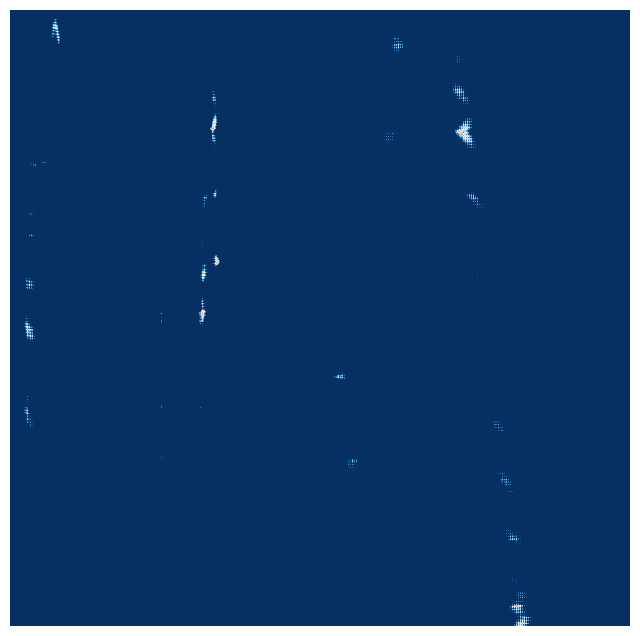

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the paths to your files
file_paths = [
    "AFM\\3_NRZ_TANGO1\\CtermTANGO1-ZW10(2)\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Create the heatmap
plt.figure(figsize=(8, 8))  # Make the figure square
sns.heatmap(df_mean, cmap='RdBu', vmin=0, vmax=20, cbar=False)  # Remove the color bar

# Remove axis labels and ticks
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()


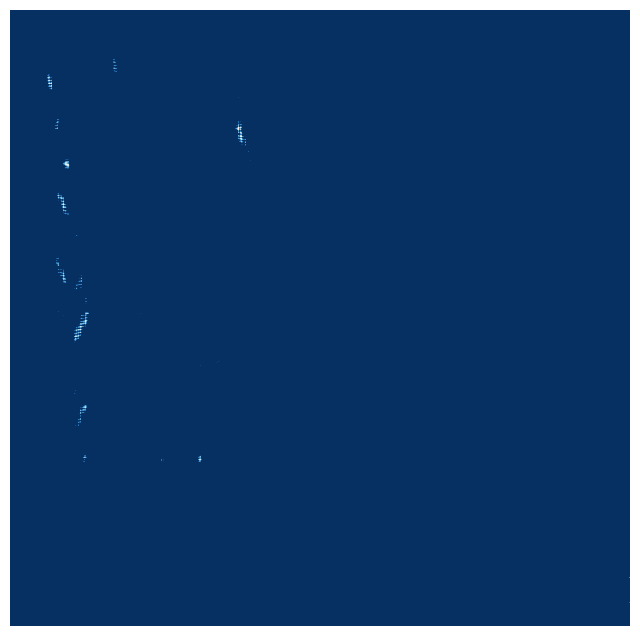

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the paths to your files
file_paths = [
    "AFM\\3_NRZ_TANGO1\\CtermTANGO1-ZW10(2)\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Create the heatmap
plt.figure(figsize=(8, 8))  # Make the figure square
sns.heatmap(df_mean, cmap='RdBu', vmin=0, vmax=20, cbar=False)  # Remove the color bar

# Remove axis labels and ticks
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()


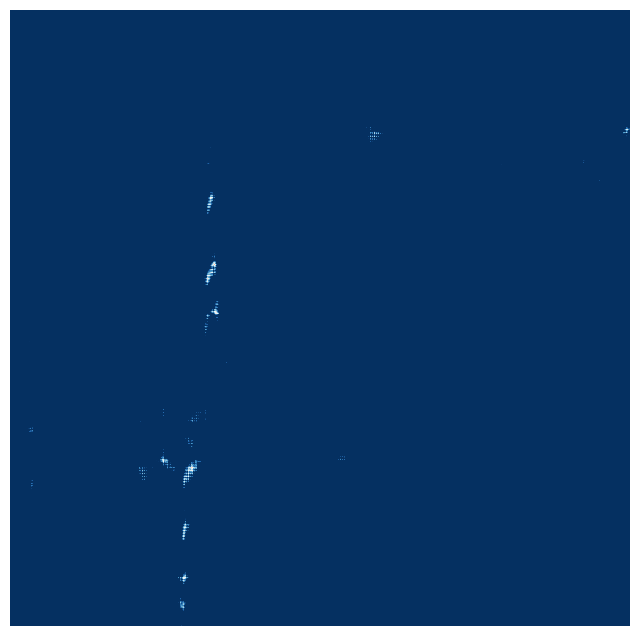

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the paths to your files
file_paths = [
    "AFM\\3_NRZ_TANGO1\\CtermTANGO1-ZW10(2)\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Create the heatmap
plt.figure(figsize=(8, 8))  # Make the figure square
sns.heatmap(df_mean, cmap='RdBu', vmin=0, vmax=20, cbar=False)  # Remove the color bar

# Remove axis labels and ticks
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()


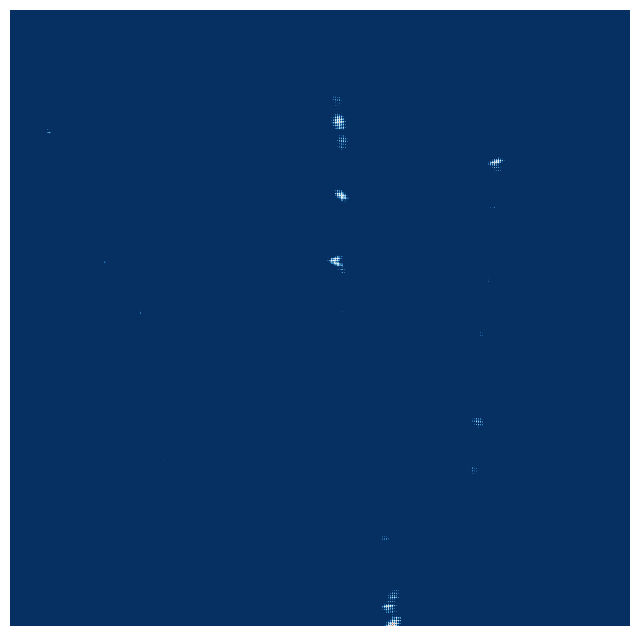

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the paths to your files
file_paths = [
    "AFM\\3_NRZ_TANGO1\\CtermTANGO1-ZW10(2)\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Create the heatmap
plt.figure(figsize=(8, 8))  # Make the figure square
sns.heatmap(df_mean, cmap='RdBu', vmin=0, vmax=20, cbar=False)  # Remove the color bar

# Remove axis labels and ticks
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()


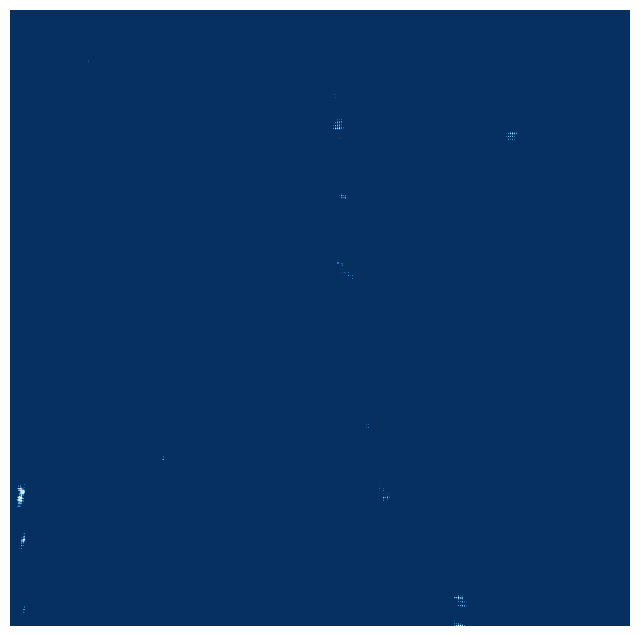

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the paths to your files
file_paths = [
    "AFM\\3_NRZ_TANGO1\\CtermTANGO1-ZW10(2)\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Create the heatmap
plt.figure(figsize=(8, 8))  # Make the figure square
sns.heatmap(df_mean, cmap='RdBu', vmin=0, vmax=20, cbar=False)  # Remove the color bar

# Remove axis labels and ticks
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()


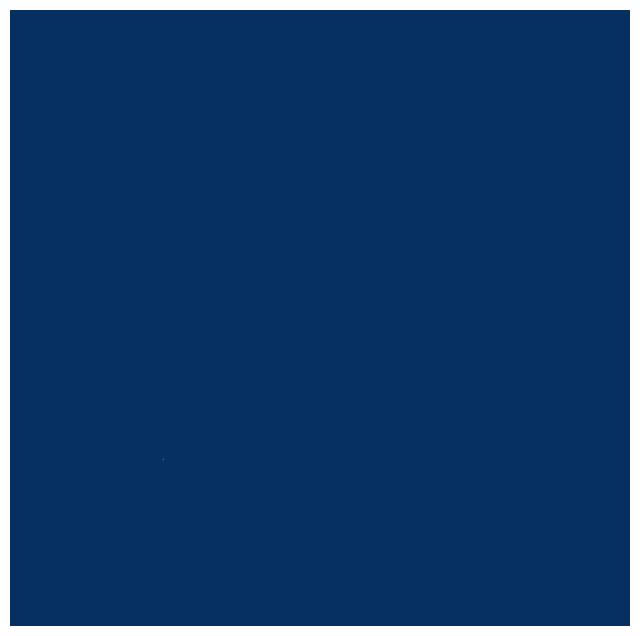

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the paths to your files
file_paths = [
    "AFM\\3_NRZ_TANGO1\\CtermTANGO1-ZW10(2)\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
    "AFM\\3_NRZ_TANGO1\\CtermTANGO1-ZW10(2)\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\3_NRZ_TANGO1\\CtermTANGO1-ZW10(2)\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\3_NRZ_TANGO1\\CtermTANGO1-ZW10(2)\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\3_NRZ_TANGO1\\CtermTANGO1-ZW10(2)\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Create the heatmap
plt.figure(figsize=(8, 8))  # Make the figure square
sns.heatmap(df_mean, cmap='RdBu', vmin=0, vmax=20, cbar=False)  # Remove the color bar

# Remove axis labels and ticks
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()
